# Video Game Sales

Let's delve into the **Video Game Sales Dataset**. This dataset provides information about the sales of video games across different regions and platforms.

 **Dataset Overview**:
   - The **Video Game Sales Dataset** includes sales data for video games spanning a period of **40 years**.
   - It covers the sales (number of copies sold) of games across (North America, Europe, Japan, Other part of the world) regions and platforms.
      
In this project, i will be performing some cleaning and exploratory data analysis (EDA) on this data using pandas and visualizing the data with Plotly Express Matplotlib and Seaborn to answer some question about the data.

 


Credits to vgchartz.com that was able to generate this data by means of scraping. You can download the data [here](https://www.kaggle.com/datasets/gregorut/videogamesales)

Let me import the data in this notebook 

In [660]:
import numpy as np
import pandas as pd

# loading the data
video_game_sales_df = pd.read_csv('vgsales.csv')

# Data Cleaning & Preparation

Explore the number of rows and columns Find the statitical values of any numeric columns Handle missing, incorrect and invalid data Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.) if need arises



In [661]:
#View the data 
video_game_sales_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


I will be selecting some columns with the relevant data for this analysis for this reason i want to drop the **Rank** column in the data

In [662]:
video_gm_sales_df = video_game_sales_df.drop(columns= "Rank", inplace=True)

In [663]:
# Checking some information about the dataset
video_game_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


This dataset contains 16598 row entries and 11 columns entries.

In [664]:
# Checking for and calculating every nan values
video_game_sales_df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

It appears that the Year and Publisher is having some nan values. To handle this, i will be filling the rows having nan as  values in the columns with and empty string.

In [ ]:
video_gm_sales_df = video_game_sales_df.dropna().reset_index(drop=True)
video_gm_sales_df

In [666]:
#Convert the year column from float to int dtype
video_gm_sales_df['Year'] = video_gm_sales_df['Year'].astype(int)

In [667]:
# Checking if there are any duplicates in the dataset
video_gm_sales_df.duplicated().value_counts()

False    16291
Name: count, dtype: int64

In [668]:
video_game_sales_df = video_gm_sales_df.drop_duplicates()

In [669]:
# Checking the statitics of all the numeric columns in the dataset
video_gm_sales_df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Now that the data is cleaned i will be asking and asking some insightful questions about this video game sales data, it would be useful to understand some of the columns variables i.e., Game publisher, genre, platform etc. It's essential to explore these variables to understand how representative the sales is in the regions.

I will be using the plotly.express, matplotlib.pyplot and seaborn for data visualization.

# Exploratory Analysis and Visualization

In [670]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import squarify
%matplotlib inline
sns.set_palette("dark")

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [671]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

In [672]:
video_gm_sales_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In this analysis i will only be checking the top 5 to 10 best selling games, genres, platforms, and regional sales in the dataset

Firstly, I want to get all the top selling games across all regions

### What are the top 10 highest-selling video games globally?

In [ ]:
# Checking the top 10 selling games globally
global_sales_df = video_gm_sales_df.sort_values(by="Global_Sales", ascending=False).head(10)
global_sales_df

In [689]:
# plotly bar chart to visualize the data
fig = px.bar(global_sales_df, x="Name", 
       y="Global_Sales",hover_data=["Name","Global_Sales", "Publisher", "Year"],
      color="Global_Sales",height=600,width=1000, text='Global_Sales',opacity=1,
             template="plotly_dark",
             color_continuous_scale="Plasma_r") 

#['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', ...]

#Customize the y-axis tick labels
fig.update_layout(  
                    
                    yaxis_tickformat=',',
                    yaxis_title="Number of Copies Sold",
                    xaxis_title="Name Of Games",
                    title="Top 10 Highest-Selling Video Games Globally",
                    title_font=dict(size=18),
                    showlegend=False,  
                    title_x=0.5, title_y=0.95, title_xanchor='center',

                 )

fig.update_traces(texttemplate=' %{text:.2f}M', textfont_size=12, textangle=0, textposition="outside")
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)

fig.show()

This graph shows all the top 10 best sellng games globally where wii sport game sold over 80 million copies in a single year. It's quite interesting that all the best 10 selling-games globally are published by **Nintendo**

### What are the top 10 best-selling video games in North America?

In [ ]:
#Top 10 highest-selling video games in North America
na_sales_df = video_gm_sales_df.sort_values(by="NA_Sales", ascending=False).head(10)
na_sales_df

In [688]:
fig = px.funnel(na_sales_df, x="NA_Sales", y="Name",  text="NA_Sales",
                hover_data=["Name","Global_Sales", "Publisher", "Year"], 
               color="NA_Sales")

#Customize the y-axis tick labels
fig.update_layout(
                    template="plotly_dark",
                    yaxis_title="Name of Games and Number of Copies Sold",
                    title="Top 10 Highest-Selling Video Games in North America",
                    title_font=dict(size=18),
                    showlegend=False,
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                 
                  )

fig.update_traces(texttemplate=' %{text:.2f}M', textfont_size=12, textangle=0)
fig.show()

In the above graph or data, Nitendo games and Kinect Adventures! game created by Microsoft Game Studios are the 10 best selling games but almost 90% of the top 10 the game sold are created by Nintendo .

### What are the top 10 highest-selling video games in Europe?

In [ ]:
#Top 10 best-selling Games in Europe
eu_sales_df = video_gm_sales_df.sort_values(by="EU_Sales", ascending=False).head(10)
eu_sales_df

In [687]:
fig = px.bar(eu_sales_df, x="EU_Sales", 
             y="Name",hover_data=["Name","Global_Sales", "Publisher", "Year"],
             color="EU_Sales", height=450, width=1000, 
             text='EU_Sales', opacity=1, orientation="h", template='plotly_dark'
             )

#Customize the y-axis tick labels
fig.update_layout(
                    yaxis_tickformat=',',yaxis_title="Name of Games and Number of Copies Sold",
                    title="Top 10 Highest-Selling Video Games in Europe",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                 )

fig.update_traces(texttemplate=' %{text:.2f}M', textfont_size=12, textangle=0, )

fig.show()

This figure depicts the best sellin games in Europe where wii sports takes the lead by selling above 29 million copies of games followed by **Mario Kart Wii, Wii Sports Resort, Nitendogs** selling above 10 million copies.

### What are the top 10 highest-selling video games in Japan?

In [ ]:
japan_df = video_gm_sales_df.sort_values(by="JP_Sales", ascending=False).head(10)
japan_df

In [686]:
# plotly bar chart to visualize the data
fig = px.bar(japan_df, x="JP_Sales", y="Name",  text="JP_Sales",height=400,
             hover_data=["Name","JP_Sales", "Publisher", "Year"],
             template='plotly_dark',

            )


#['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', ...]

#Customize the y-axis tick labels
fig.update_layout(  
                    
                    yaxis_tickformat=',',
                    yaxis_title="Number of Copies Sold",
                    xaxis_title="Name Of Games",
                    title="Top 10 Highest-Selling Video Games in Japan",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',   

                 )

fig.update_traces(texttemplate=' %{text:.2f}M', textfont_size=12, textangle=0, textposition="outside", marker_color='green')
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)

fig.show()

It clearly shows that in Japan all the top 10 best selling games are designed by Nintendo. 
**Pokemon Red/Pokemon Blue** selling about 10 million  and above in 2006 accompanied by **Pokemon Gold/Pokemon Silver,  Super Mario Bros, New Super Mario Bros, Pokemon Diamond/Pokemon Pearl** selling avove 5 million copies each.

### What are the top 10 highest-selling video games in other part of the world?

In [ ]:

other_df = video_gm_sales_df.sort_values(by="Other_Sales", ascending=False).head(10)
other_df

In [685]:
fig = px.bar(other_df, x="Name", 
       y="Other_Sales",hover_data=["Name","Other_Sales", "Publisher", "Year"],
      color="Other_Sales",height=600,width=1000, text='Other_Sales',opacity=1,
             template="plotly_white", 
             color_continuous_scale="Plasma") 

#Customize the y-axis tick labels
#['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', ...]
fig.update_layout(                    
                    yaxis_tickformat=',',
                    yaxis_title="Number of Copies Sold",
                    xaxis_title="Name Of Games",
                    title="Top 10 Highest-Selling Video Games in Other Part Of The World",
                    title_font=dict(size=18),
                    showlegend=True, 
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )


fig.update_traces(texttemplate=' %{text:.2f}M', textfont_size=12, textangle=0, textposition="outside",)
fig.update_xaxes(showgrid=False)
#fig.update_yaxes(showgrid=False)

fig.show()

And in **Other parts of the world**, 

- **Grand Theft Auto: San Andreas** by Take-Two Interactive had the highest sales followed by **Wii Sport** games and **Grand Turismo 4** as third most best selling games in other parts of the world.

In [690]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import offline

# Structuring the subplots
fig = make_subplots(rows=3,cols=2, 
                    subplot_titles=("Top 10 Highest-Selling Video Games in Japan", 
                                    "Top 10 Highest-Selling Video Games in North America", 
                                    "Top 10 Highest-Selling Video Games in Other Part Of The World",
                                    "Top 10 Highest-Selling Video Games in Europe",
                                    "Top 10 Highest-Selling Video Games Globally"),
                    specs= [[{}, {}],
                            [{}, {}],
                            [{'colspan': 2}, None]],
                    horizontal_spacing=0.2, #10% of figure width
                    vertical_spacing=0.11, #5% of figure height
                    column_widths=[0.5, 0.5], #first column is wider
                    row_heights=[0.3, 0.3, 0.4], # Third row is taller
                    
                    )

#Japan Sales
fig.add_trace(go.Bar(x=japan_df["JP_Sales"],
                     y=japan_df["Name"], 
                     orientation='h',
                     text=japan_df["JP_Sales"], 
                     textposition='outside'),row=1, col=1,
                     )
fig.update_traces(texttemplate=' %{text:.2f}M',
                  marker_color='green',row=1, col=1)

#North America Sales
fig.add_trace(go.Funnel(x=na_sales_df["NA_Sales"],
                     y=na_sales_df["Name"], 
                     text=na_sales_df["NA_Sales"],
                     textposition="inside"),row=1, col=2)
fig.update_traces(texttemplate=' %{text:.2f}M', textfont_size=25,  marker_color='blue')

#Other Sales
fig.add_trace(go.Bar(x=other_df["Name"],
                     y=other_df["Other_Sales"], 
                     text=other_df["Other_Sales"], 
                     textposition='outside',
                     marker=dict(color=other_df["Other_Sales"])),row=2, col=1)
fig.update_traces(texttemplate=' %{text:.2f}M', textfont_size=20,)





# Europe Sales
fig.add_trace(go.Bar(x=eu_sales_df["Name"],
                     y=eu_sales_df["EU_Sales"], 
                     marker=dict(color=eu_sales_df["EU_Sales"], #Using color_continous_scale
                     colorscale='rdylgn',# Specify an inbuilt color
                     cmin=eu_sales_df["EU_Sales"].min(), # Set the min value for the color scale
                     cmax=eu_sales_df["EU_Sales"].max()), # Set the max value for the color scale),
                     text=eu_sales_df["EU_Sales"].apply(lambda x:  f'{x:.2f}M'),
                     textposition='outside'),row=2, col=2)
fig.update_traces(texttemplate=' %{text:.2f}M',textfont_size=20,
                  marker_color='green',row=1, col=1)
 
# Global Sales
fig.add_trace(go.Bar(x=global_sales_df["Name"],
                     y=global_sales_df["Global_Sales"], 
                     #Using color_continous_scale
                     marker=dict(color=global_sales_df["Global_Sales"], colorscale='picnic',#mrybm Specify an inbuilt color
                                cmin=global_sales_df["Global_Sales"].min(), # Set the min value for the color scale
                                cmax=global_sales_df["Global_Sales"].max()), # Set the max value for the color scale
                     text=global_sales_df["Global_Sales"].apply(lambda x: f'{x:.2f}M'),
                     textposition='outside',
                      hoverinfo='text'),row=3, col=1)



#Update the figure layout
fig.update_layout(height=900, width=1000,template="plotly_dark", title_text="Game Sales Dashboard",
                  
                  title_x=0.5, title_y=0.95, title_xanchor='center',
                 )
#Adjusting the text sizes of the ticks
fig.update_xaxes(tickfont=dict(size=8), )
fig.update_yaxes(tickfont=dict(size=8))

fig.update_xaxes(showgrid=False)
fig.update_xaxes(showgrid=False, range=[0, 10  + 3],row=1, col=1)
fig.update_yaxes(showgrid=False, range=[0, 10  + 3],row=2, col=1)
fig.update_yaxes(showgrid=False, range=[0, 90  + 5], row=3, col=1)

# Update subplot titles font size
fig.update_annotations(font=dict(size=10))  # Adjust the size as needed
fig.show()

In these findings, it was discorvered that **Nintendo** dominates the market, with over 90% of the top 10 best-selling games being developed among all other publishers. This statistics did not only underscores Nintendo's huge impact on the gaming industry but also highlights their ability to consistently create games that attracts the global audience.

**Next i want to share to explore the pulishers to get some insights.**

In [691]:
#Checking the unique values of the sales
video_gm_sales_df.nunique()

Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

It appears that in this video game sales,

- **11325 games are being sold over the years**

- **31 different platforms which these games run on**

- **12 types of games**

- **More than 500 different publisher are present in the data**

I will be exploring some of these columns starting with the Publishers.

# Publisher


I want to know which publisher has the highest number of games/copy sold. I will also be grouping the data by Publisher in order to identify which publishers are most successful in the video game industry.

**Who are the top 5 publishers (based on sales) from 1980 to 2016?**

In [692]:
publisher_counts = video_gm_sales_df.Publisher.value_counts().head(20)
publisher_counts

Publisher
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Name: count, dtype: int64

The data collected over the years shows that the most popular publisher is **Electronic Arts**  in terms of game titles. Out of the 11325 games in the data Electronic Art designed 1339 followed Activision to Sega which were able to sell more than 500 different game titles over the years.

I will be grouping the data by publisher and sum all the number of game copies sold in North America, Europe, Japan, other part of the world and Globally to get the top publisher with the highest sales.

In [ ]:
# Checking the top 5 best selling  publishers across the years
top_5_best_game_sales_by_publisher =  video_gm_sales_df.groupby("Publisher")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", 'Global_Sales']].sum()
top_5_best_game_sales_by_publisher

# Reseting the index and displaying the top 5 of the publisher with the highest sales 
top_5_best_game_sales_by_publisher = top_5_best_game_sales_by_publisher.sort_values('NA_Sales', ascending=False).head(5).reset_index()
top_5_best_game_sales_by_publisher

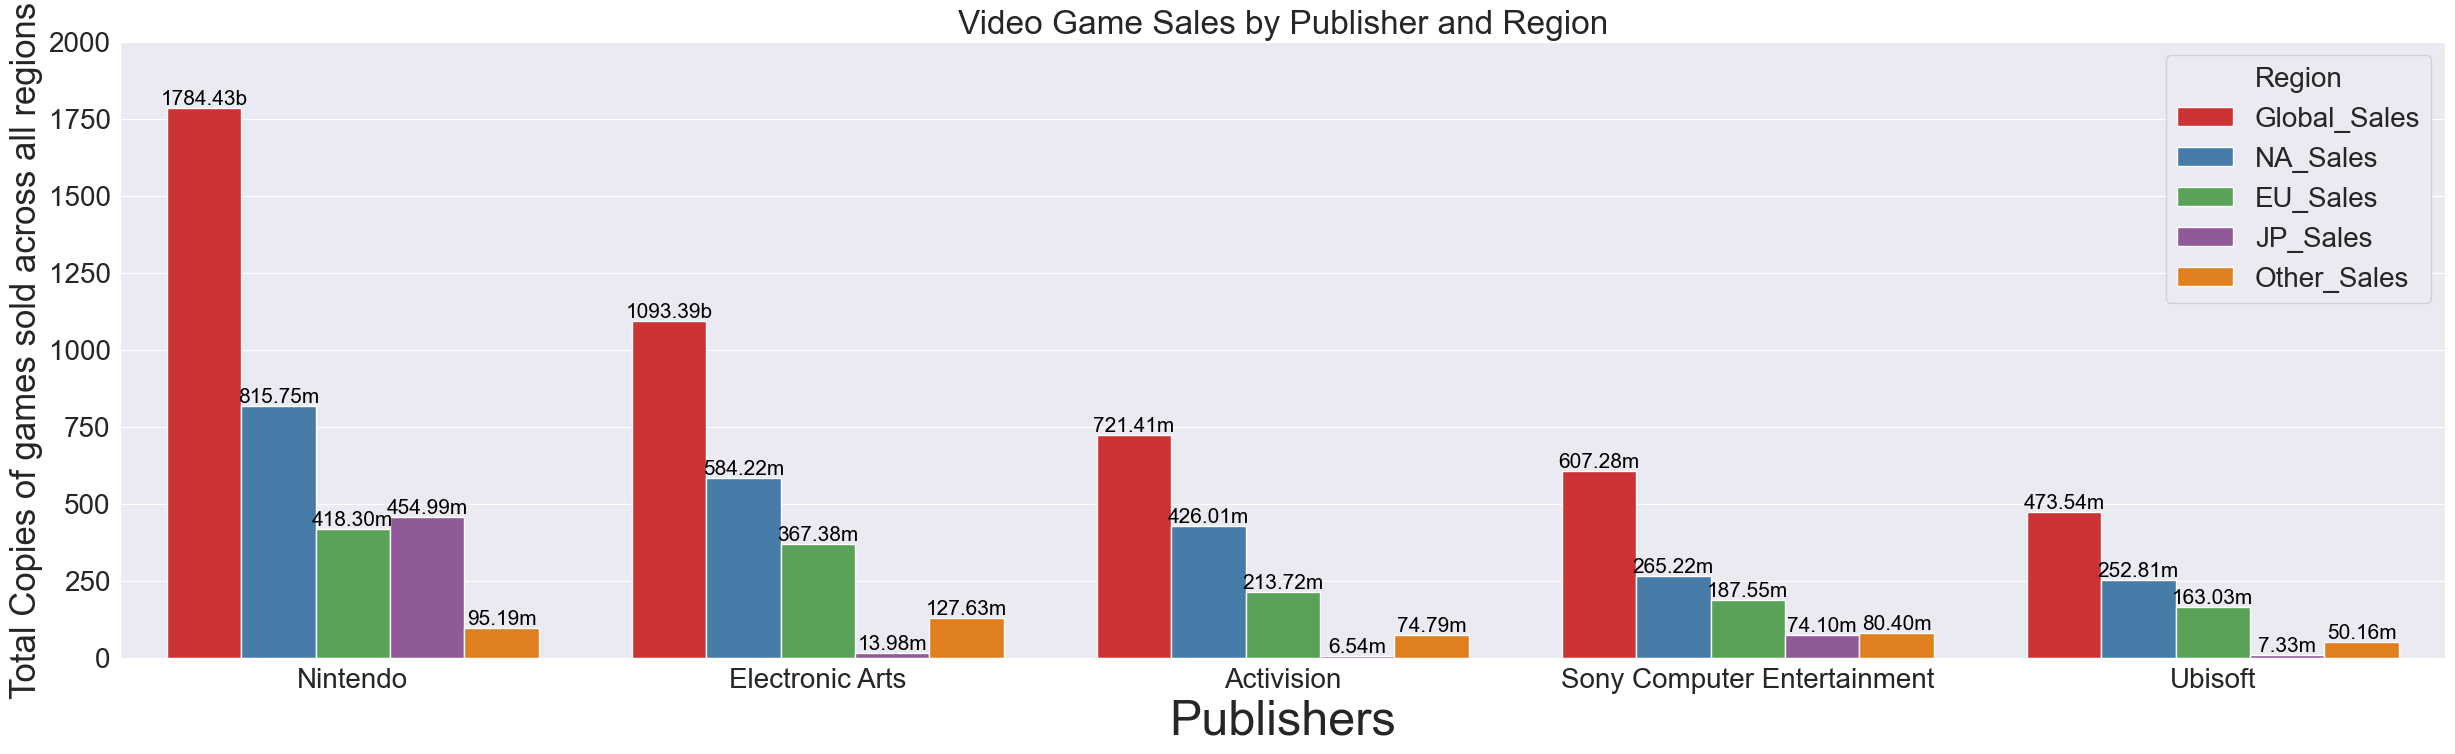

In [694]:
#Trying to create a side by side bar charts with seaborn
# Melt the DataFrame to create a tidy format
top_5_best_game_sales_by_publisher_melted = pd.melt(top_5_best_game_sales_by_publisher, id_vars='Publisher', 
                                                    value_vars=["Global_Sales",'NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales"])

# Create the side-by-side bar plot using Seaborn
plt.figure(figsize=(30, 8));
ax = sns.barplot(data=top_5_best_game_sales_by_publisher_melted, x='Publisher', y='value', hue="variable", palette='Set1')


# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height >= 1000:
        label = f"{height:.2f}b"   # Change label to billion
    else:
        label = f"{height:.2f}m"  # Keep others in million

    ax.annotate(label, (p.get_x() + p.get_width() / 2., height+30),
                ha='center', va='center', fontsize=15, color='black')

# Modify y-ticks to include 'b' for billions
y_values = [int(tick) for tick in ax.get_yticks()]


# Customize the plot
plt.ylim(0, 2000)
plt.yticks()
plt.xlabel('Publishers',fontsize=35)
plt.ylabel('Total Copies of games sold across all regions',fontsize=25)
plt.title('Video Game Sales by Publisher and Region')
plt.xticks( rotation=0,fontsize=20)
plt.legend(title='Region')

# Show the plot
#plt.tight_layout()
plt.show()

Looking at the barchart we can denote that;

- Different colors represent sales in different regions: Global_Sales (red), NA_Sales (blue), EU_Sales (green), JP_Sales (purple) and Other_Sales (orange).

- **Nintendo** made a huge impact in North Amereica with more than 815 millions copies of games sold, which is the highest sales in almost all regions and has the highest sales with more than 1.6 billions unit of games sold globally.

- **Electronic Arts** sold more than 960 millions unit of games globally and poor sales in Japan.

- **Activision and 'Sony Computer Entertainment'** sold more than 500 millions unit of games, also lesser sales in Japan.

- While **Ubisoft** and others sold below 500 millions unit and lesser sales in Japan.

As the chart clearly shows, Nitendo game consoles are the best selling consoles in all regions except in **other part of the world** where **Elcetronic Art** had more sales. 

Base on personal preference i will into some of the top publishers and the publishers i played their games to get some insights about them. 



# Nintendo 🎮

In [ ]:
nintendo_df = video_gm_sales_df[video_gm_sales_df['Publisher'].str.contains("Nintendo")]
nintendo_df

In [700]:
 
nintendo_genre_df = nintendo_df.Genre.value_counts()
nintendo_genre_df

Genre
Platform        111
Role-Playing    105
Misc            100
Action           78
Puzzle           74
Sports           55
Racing           37
Adventure        35
Strategy         31
Simulation       28
Shooter          24
Fighting         18
Name: count, dtype: int64

Over the years Nintendo created more than 100 **Platform, Role-Playing and Misc** game titles. Also they were able to design more than 50 game title for **Sports, Puzzle and Action games**.


Let's see the market trends on each genre of games by getting the sum total of each across all the regions.

In [ ]:
# Calculating the total number of sales by Nintendo's genre games developed
ntd_df = nintendo_df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales", "Global_Sales"]].sum().reset_index().sort_values("Global_Sales", ascending=False);
ntd_df

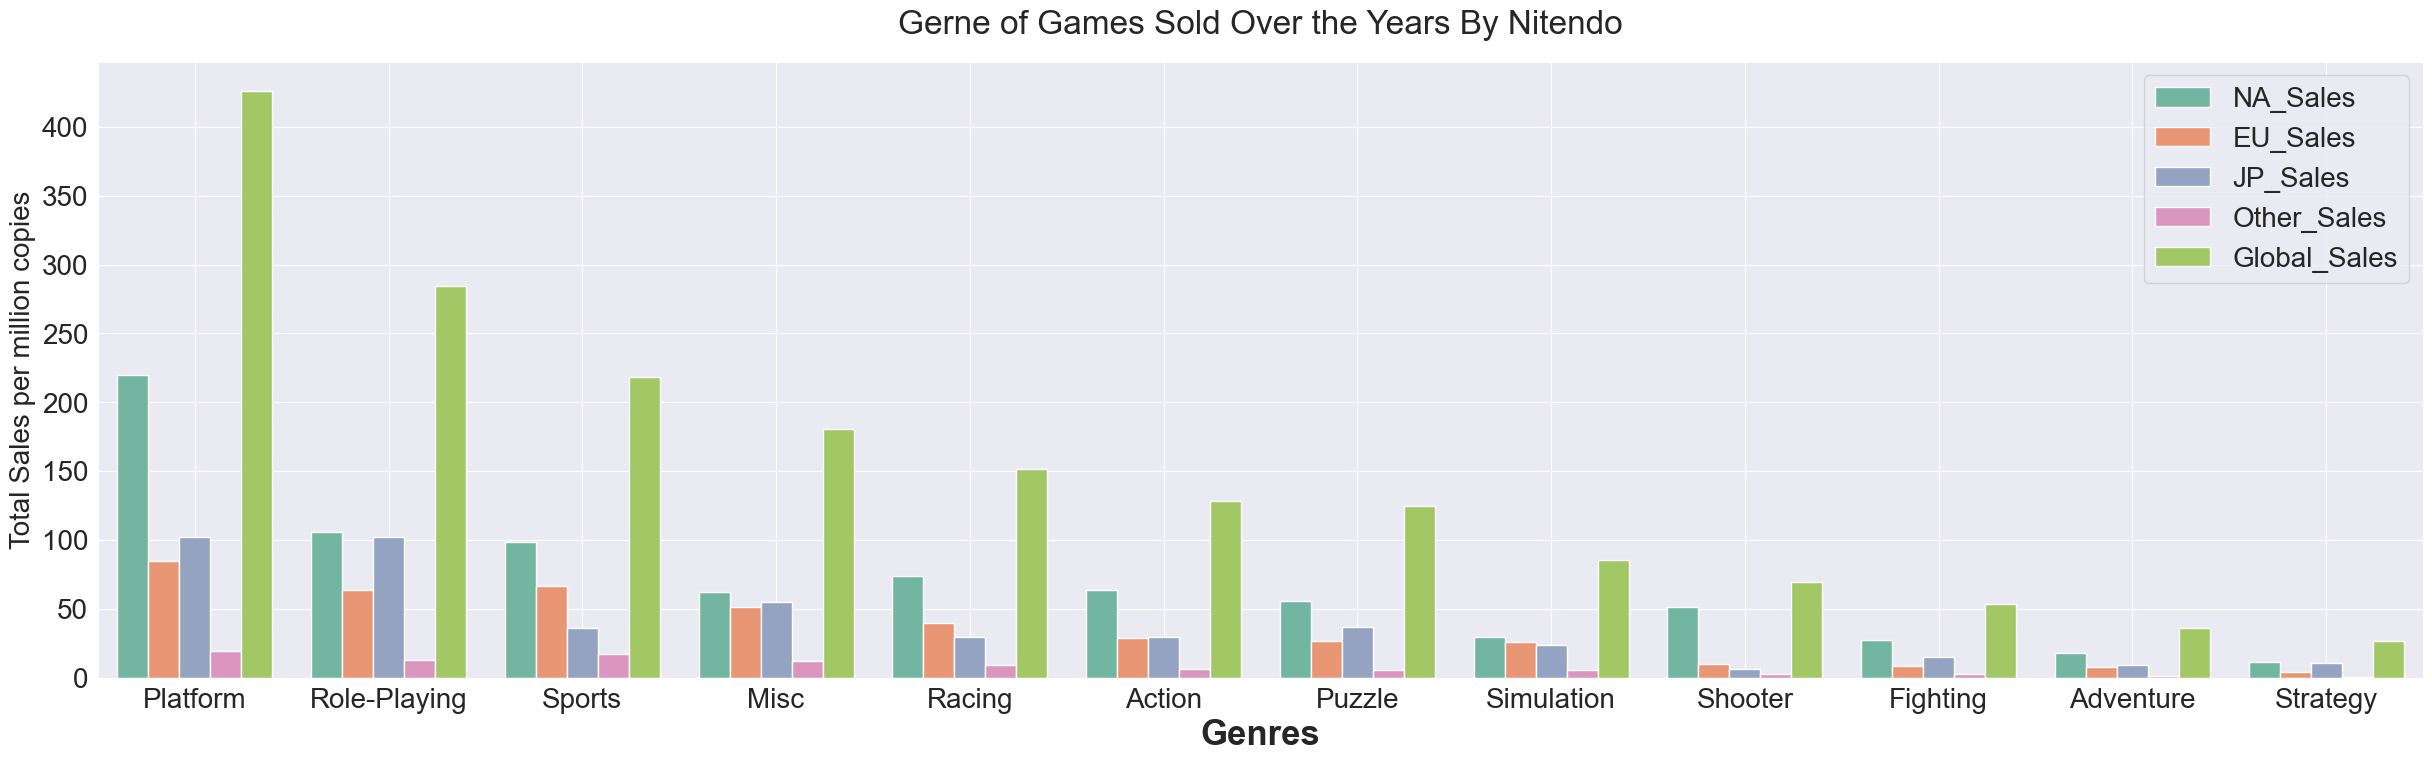

In [702]:
plt.figure(figsize=(30, 8));


# Structuring the dataframe by melting the DataFrame to create a tidy format
ntd_melted = pd.melt(ntd_df, id_vars='Genre', 
                    value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales", "Global_Sales"])

ax = sns.barplot(data=ntd_melted, x='Genre', y='value', hue="variable", palette='Set2')



# Customize the plot
plt.title('Gerne of Games Sold Over the Years By Nitendo', pad=20)
plt.xlabel('Genres',fontweight='bold',fontsize=25)
plt.ylabel('Total Sales per million copies')
plt.legend()

# Show the plot
plt.grid(True)




This market trend shows that Nintendo **Platform** games are the most patronized genre of games by gamers selling more than 400 million copies globally and more than 200 millions across North America.Note that these results may be due to more platform games being created. 
Also **Role Playing** games and sport games sold more than 250 millions copies globally.

### How do their game sales varies per year and in what **Year** Nintendo has maximum sales?

In [ ]:
nintendo_year_df = nintendo_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
nintendo_year_df

In [704]:
nintendo_year_df.index = nintendo_year_df.index.astype(str)


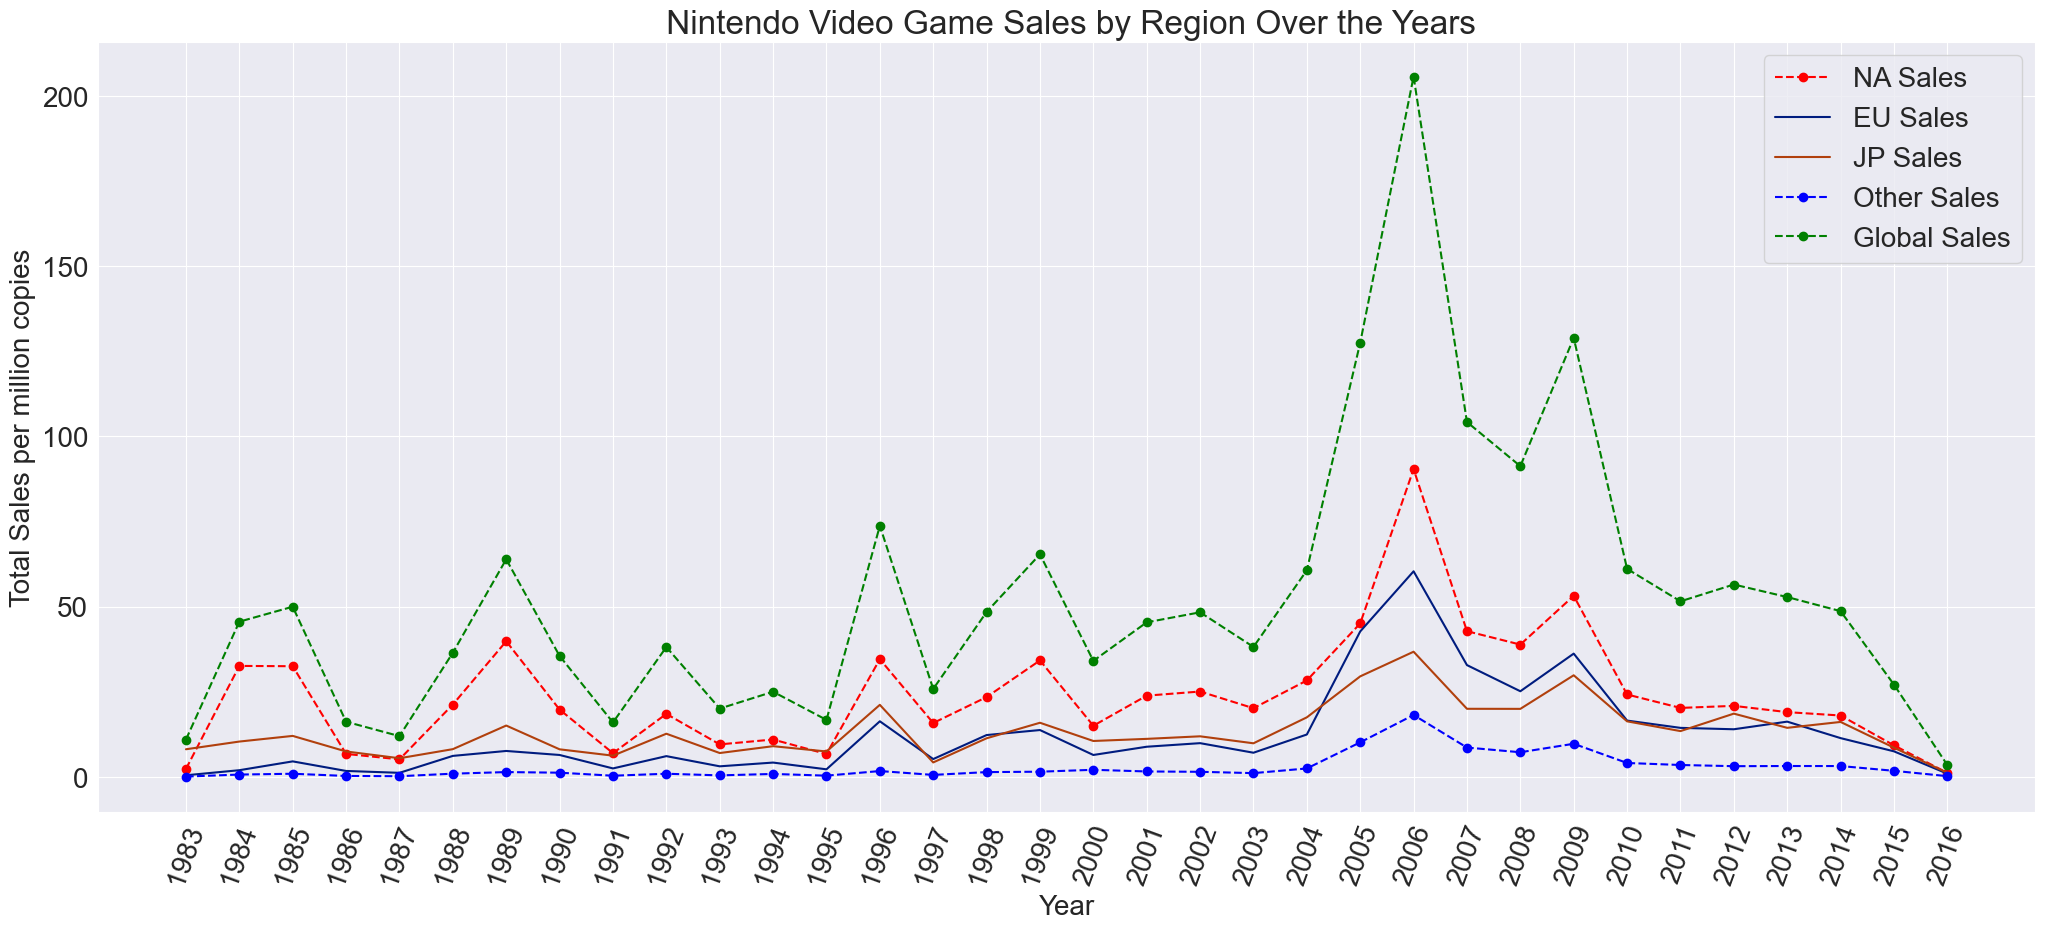

In [705]:
plt.figure(figsize=(25, 10))

# Plot the lines for each region
plt.plot(nintendo_year_df.index, nintendo_year_df['NA_Sales'], 'o--r',  label='NA Sales',)
plt.plot(nintendo_year_df.index, nintendo_year_df['EU_Sales'],  label='EU Sales')
plt.plot(nintendo_year_df.index, nintendo_year_df['JP_Sales'],  label='JP Sales')
plt.plot(nintendo_year_df.index, nintendo_year_df['Other_Sales'], 'o--b', label='Other Sales')
plt.plot(nintendo_year_df.index, nintendo_year_df['Global_Sales'],'o--g', label='Global Sales')

# Customize the plot
plt.title(' Nintendo Video Game Sales by Region Over the Years')
plt.xlabel('Year')
plt.xticks( rotation=70,fontsize=20)

plt.ylabel('Total Sales per million copies')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


It appears that Nintendo had their highest sales in 2006 selling more than 200 million copies globally. Moreso, in this year they had their highest single game sale **wii sport** selling more than 41 million copies.

Next i want to share the percentages of the regional sales to know which region Nitendo sold most of their games.

In [706]:
# Checking the regional sales to know which region 
regional_percent =  nintendo_year_df[['JP_Sales', 'EU_Sales', 'NA_Sales', 'Other_Sales',]].sum()
regional_percent

JP_Sales       454.99
EU_Sales       418.30
NA_Sales       815.75
Other_Sales     95.19
dtype: float64

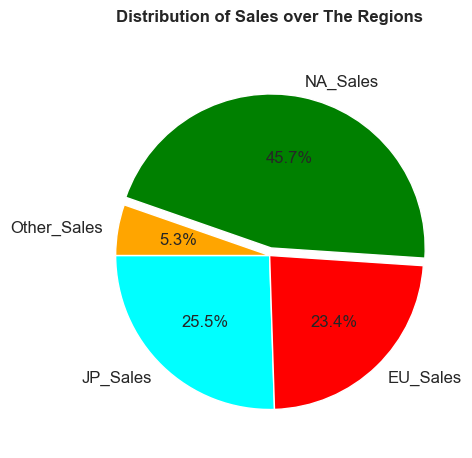

In [709]:
explode=[0,0,0.05,0];
color= ['cyan', 'red', 'green', 'orange']

plt.pie(regional_percent,labels=regional_percent.index,radius=1,autopct='%1.1f%%',textprops={'fontsize':12},
        startangle=180,explode=explode,colors=color);



# Customize the plot
plt.title('Distribution of Sales over The Regions',fontsize=12, fontweight='bold', pad=30);



This pie chart provides a visual representation of the distribution of video game sales across various regions over multiple years. It highlights North America’s dominance in the market with 45.7% of total sales, followed by Japan which is best customers base on single country sales. Also, Europe at 23.4%, and other regions collectively contributing 5.3%. This data underscores the varying consumer preferences and market strengths in the global gaming industry. 

**Creating a subplots to summarise Nintendo Sales**

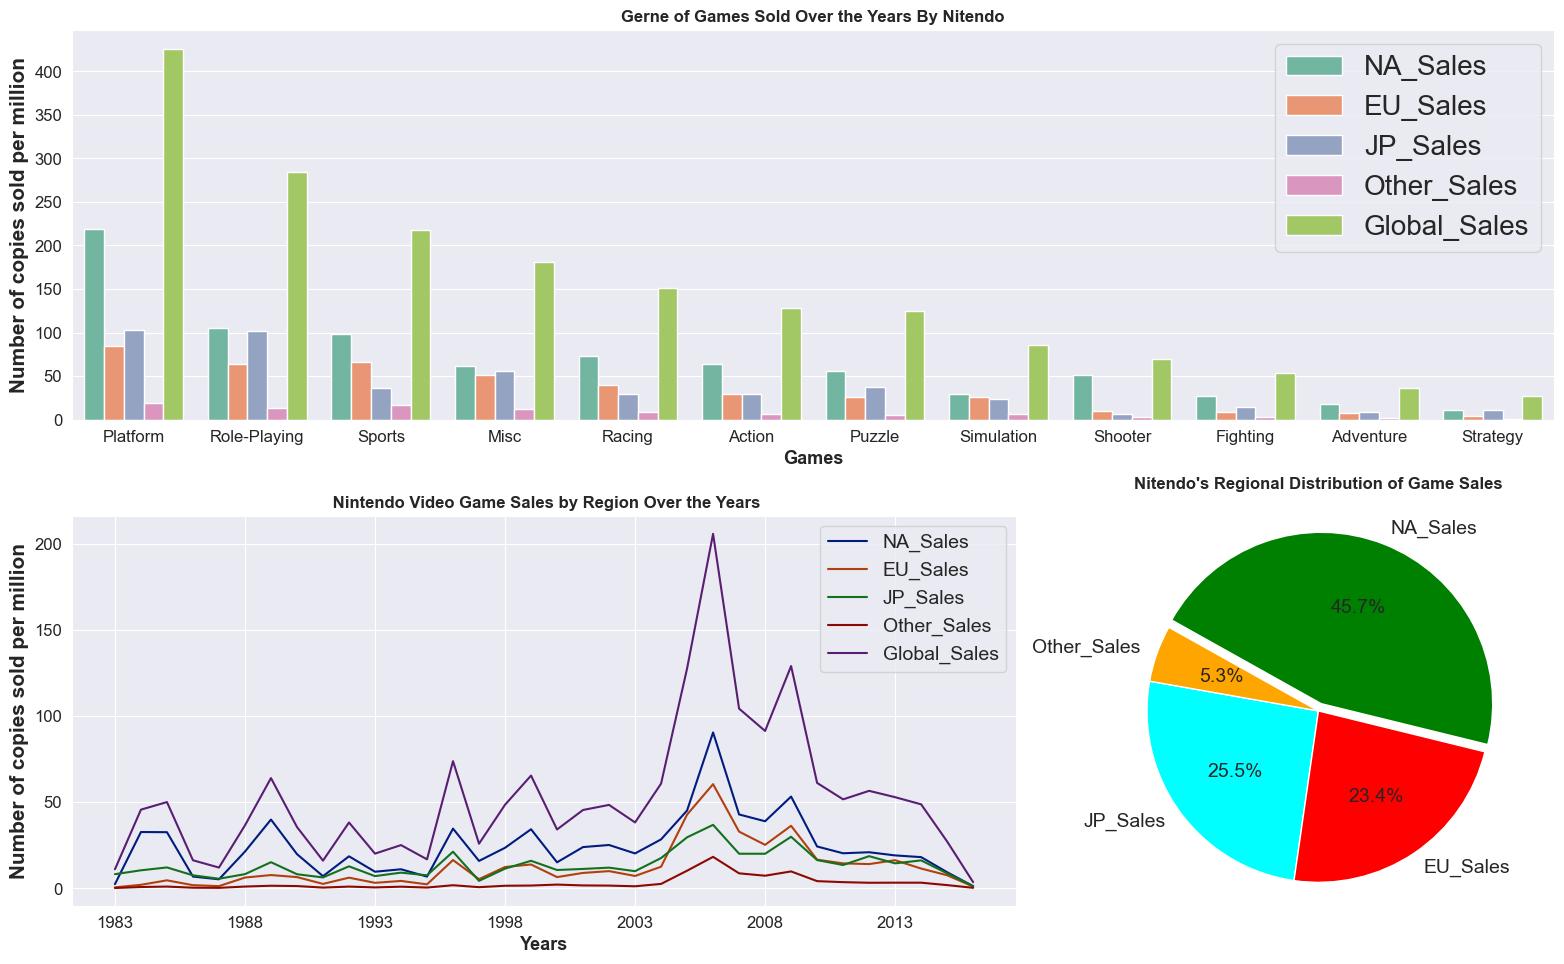

In [708]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(16, 10));

# Define the grid layout
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2], width_ratios=[2,1]);

# Create subplots
ax1 = fig.add_subplot(gs[0, :]);
ax2 = fig.add_subplot(gs[1, 0]);
ax3 = fig.add_subplot(gs[1, 1]);




# Plot the lines for each region
#nintendo_year_df.plot(ax=ax1)
sns.barplot(data=ntd_melted, x='Genre', y='value', hue="variable", palette='Set2',ax=ax1);



# Labels customization
#ax1.set_xlim(0, max(highest_selling_racing_NA_games_df['NA_Sales']) *2)
ax1.set_xlabel('Games', fontsize=13, fontweight='bold');
ax1.set_ylabel('Number of copies sold per million', fontsize=15, fontweight='bold');
ax1.tick_params(axis='x', labelsize=12, rotation=0);
ax1.tick_params(axis='y', labelsize=12);
ax1.set_title('Gerne of Games Sold Over the Years By Nitendo', fontsize=12, fontweight='bold');
ax1.legend(fontsize=20) ;



#Line plot for ax2
nintendo_year_df.plot(ax=ax2);

# Labels customization
#ax1.set_xlim(0, max(highest_selling_racing_NA_games_df['NA_Sales']) *2)
ax2.set_xlabel('Years', fontsize=13, fontweight='bold');
ax2.set_ylabel('Number of copies sold per million', fontsize=15, fontweight='bold');
ax2.tick_params(axis='x', labelsize=12, rotation=0);
ax2.tick_params(axis='y', labelsize=12);
ax2.set_title(' Nintendo Video Game Sales by Region Over the Years', fontsize=12, fontweight='bold');
ax2.legend(fontsize=14) ;


#Pie chart for ax2
explode=[0,0,0.05,0];
color= ['cyan', 'red', 'green', 'orange'];

ax3.pie(regional_percent,labels=regional_percent.index,
        radius=1.1,autopct='%1.1f%%',textprops={'fontsize':14},
        startangle=170,explode=explode,colors=color);

# Move the pie chart downwards
ax3.set_position([0.53, 0.13, 0.5, 0.25]);  # Adjust the coordinates as needed
ax3.set_title("Nitendo's Regional Distribution of Game Sales", fontsize=12, fontweight='bold', pad=20);



#ax1.set_xticks([])
#ax1.set_yticks([])

plt.tight_layout(pad=1);

1. **Genre of Games Sold Over the Years By Nintendo**:
   - Different colors represent sales in different regions: NA_Sales (green), EU_Sales (red), JP_Sales (blue), Other_Sales (purple), and Global_Sales (cyan).
   - The bar chart shows the number of copies sold per million for different game genres.
   - Platform games have the highest number of copies sold.
   - Genres include Platform, Role-Playing, Sports, Misc, Racing, Action, Puzzle, Simulation, Shooter, Fighting, and Adventure Strategy.
   

2. **Nintendo Video Game Sales by Region Over the Years**:
   - The line chart spans from 1983 to 2016.
   - It illustrate sales trends in different regions (NA, EU, JP, Other) and globally.

3. **Nintendo’s Regional Distribution of Game Sales**:
   - NA_Sales constitute 45.7% of total sales.
   - EU_Sales are 23.4%, JP_Sales are 25.5%, and Other_Sales are 5.3%.

Nintendo's platform games have been the most successful, with North America being the largest market for sales.



Moving futher, i will be repeating the same analysis for the rest of the publishers i played their games.

# Electronic Arts 🎮

In [710]:
electronic_art_df = video_gm_sales_df[video_gm_sales_df['Publisher'].str.contains("Electronic Arts")]

In [711]:
electronic_genre_df = electronic_art_df.Genre.value_counts()
electronic_genre_df


Genre
Sports          555
Action          183
Racing          159
Shooter         139
Simulation      116
Misc             43
Fighting         38
Strategy         37
Role-Playing     35
Platform         16
Adventure        13
Puzzle            7
Name: count, dtype: int64

These are the number of Genre game title Electronic Arts created in the course of the years. It appears that they focused more on sport games creating about 555 different sport game titles.

In [ ]:
elect_art_df = electronic_art_df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales", "Global_Sales"]].sum().reset_index().sort_values("Global_Sales", ascending=False);
elect_art_df

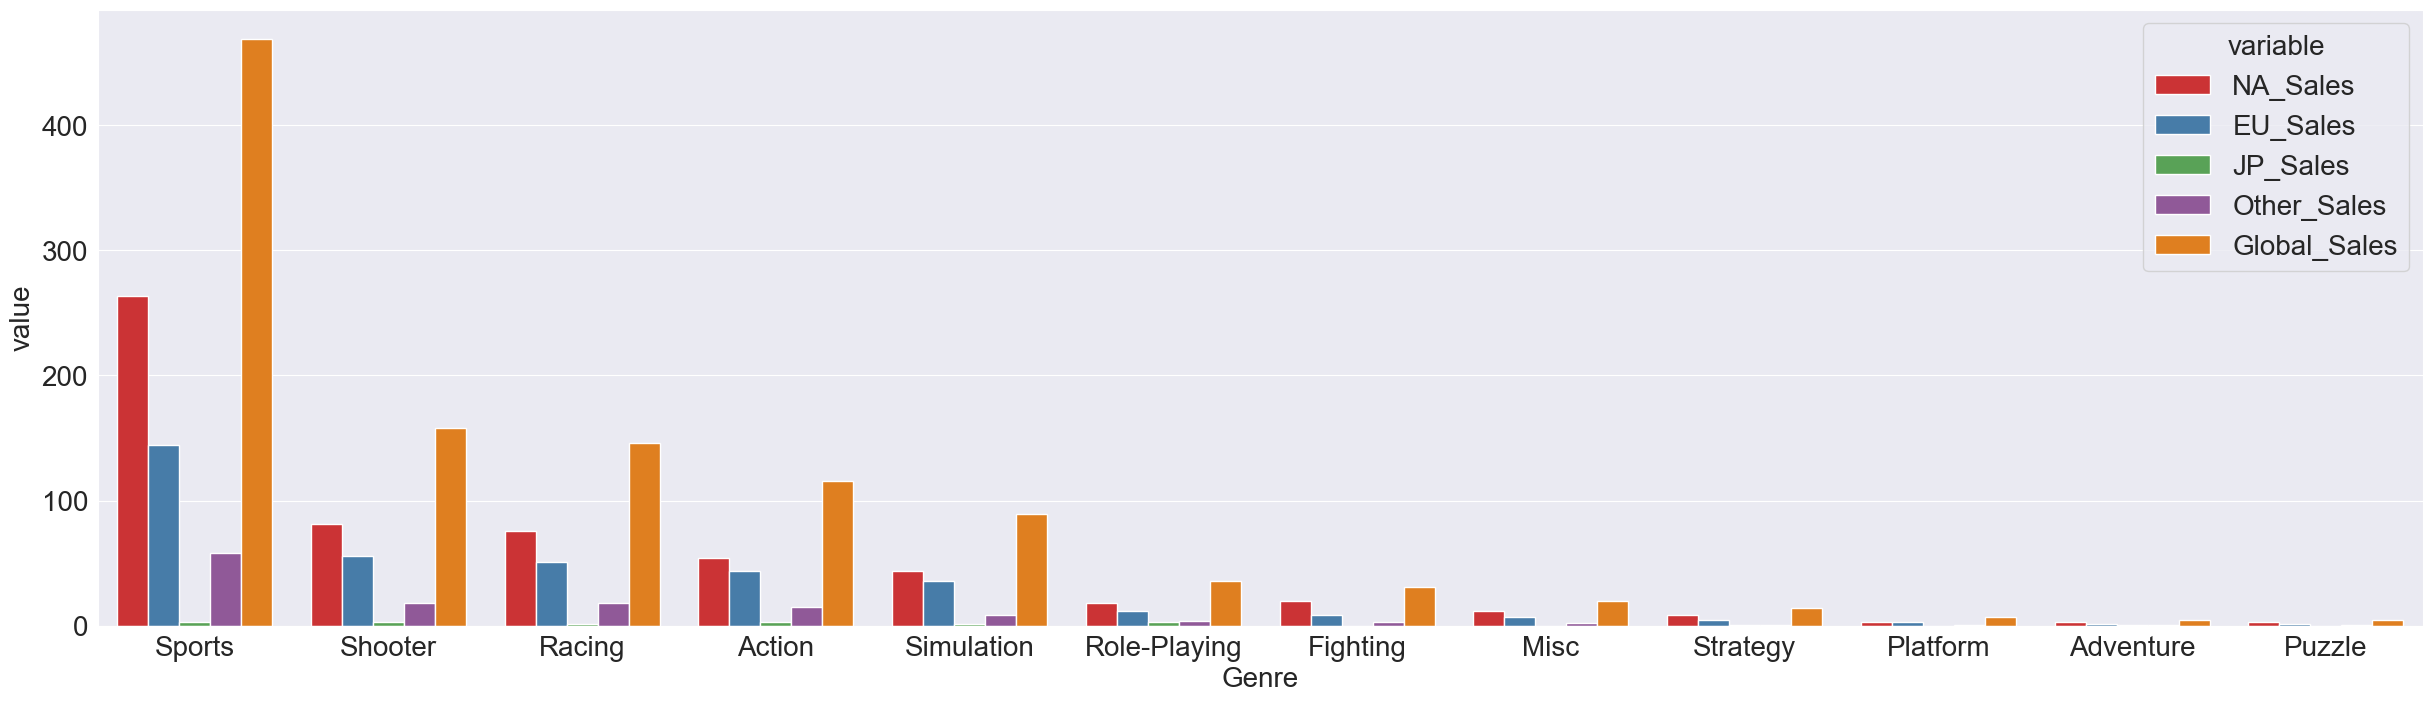

In [713]:
plt.figure(figsize=(30, 8));


# Melt the DataFrame to create a tidy format
elect_art_df_melted = pd.melt(elect_art_df, id_vars='Genre', 
                    value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales", "Global_Sales"])

ax = sns.barplot(data=elect_art_df_melted, x='Genre', y='value', hue="variable", palette='Set1')

This bar graph summarize the total sales of Electronic Arts games by genre. **Sports** genre dominates, both in North America, with significant sales also recorded in Europe and other regions. 

Other genres like “Shooter,” “Racing,” and “Action” also sells in both **North America and Europe** regions, contributing to the global sales figures, but they had poor sales all the genre of games across Japan and very poor sales of their **Role-Playing, Fighting, Misc, Strategy, Platform, Adventure, and Puzzle** games. The graph illustrates the popularity and market trends of different game genres within Electronic Arts’ portfolio.

Let's also check their sum total of all the regions over the years.

In [ ]:
electronic_year_df = electronic_art_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
electronic_year_df

In [715]:
electronic_year_df.index = electronic_year_df.index.astype(str)

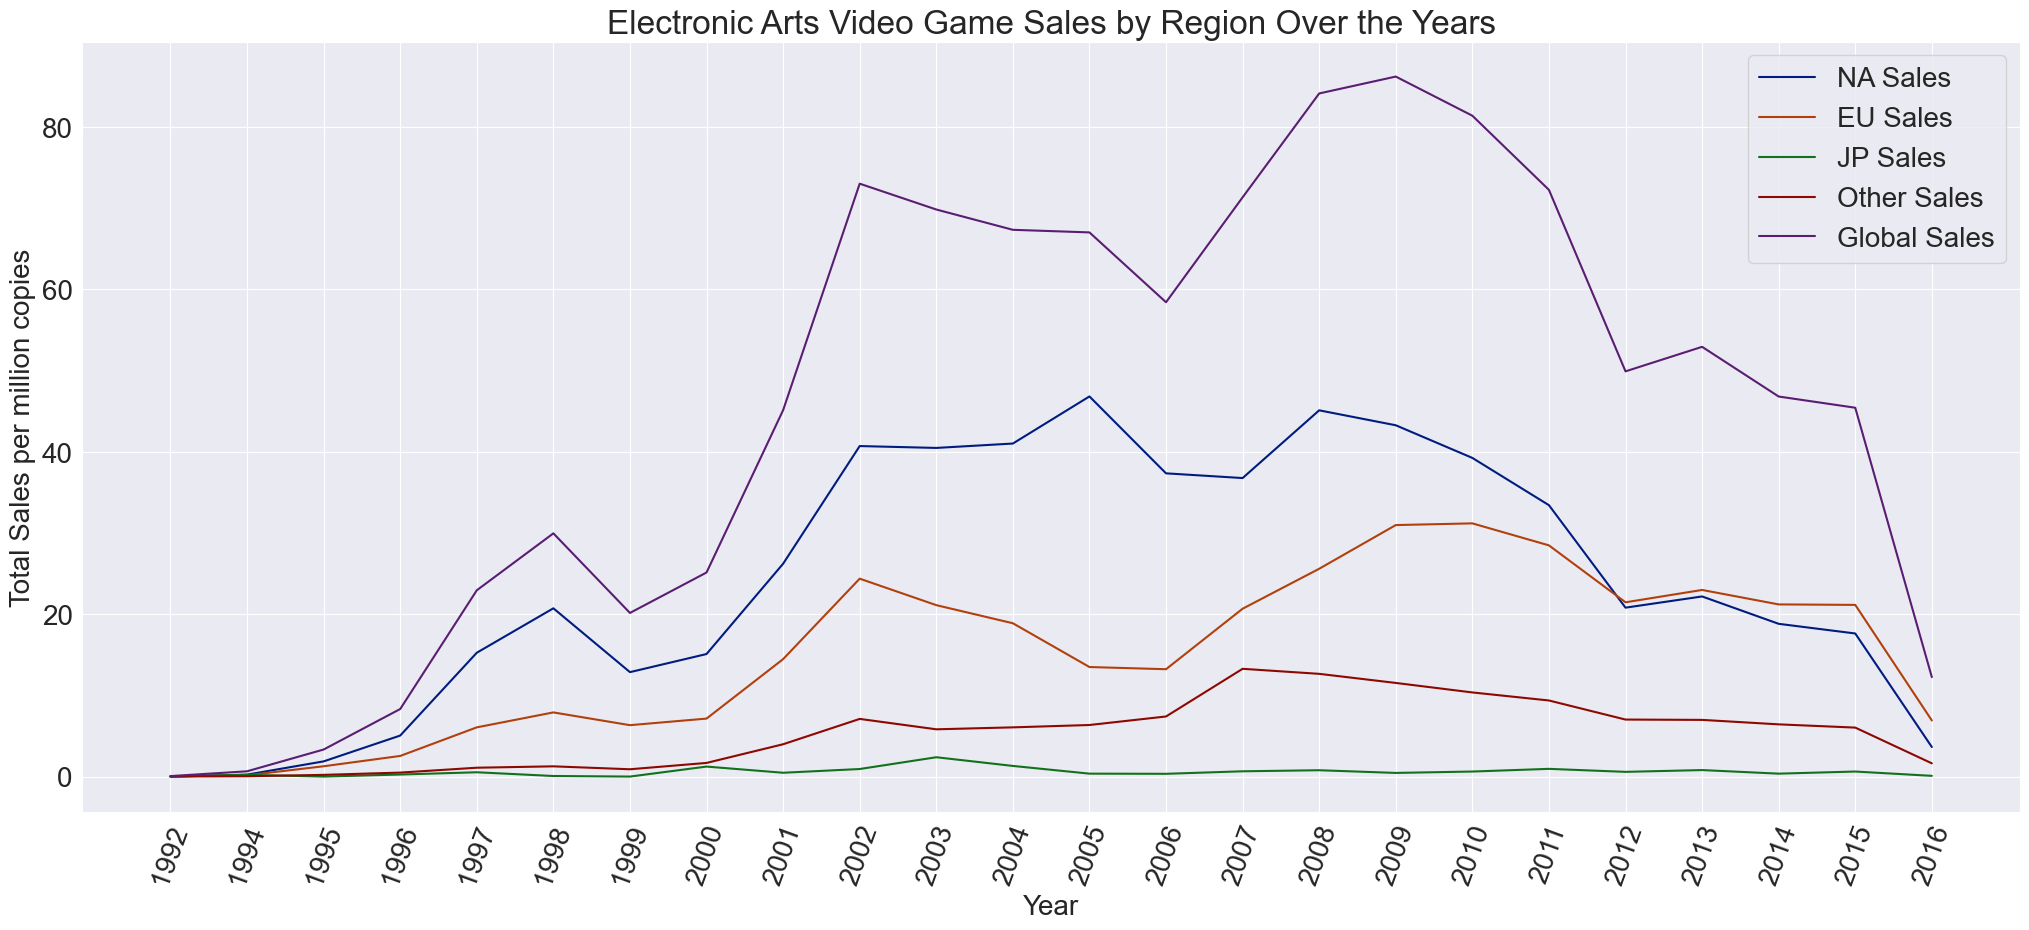

In [716]:
plt.figure(figsize=(25, 10))

# Plot the lines for each region
plt.plot(electronic_year_df.index, electronic_year_df['NA_Sales'],  label='NA Sales',)
plt.plot(electronic_year_df.index, electronic_year_df['EU_Sales'],  label='EU Sales')
plt.plot(electronic_year_df.index, electronic_year_df['JP_Sales'],  label='JP Sales')
plt.plot(electronic_year_df.index, electronic_year_df['Other_Sales'],  label='Other Sales')
plt.plot(electronic_year_df.index, electronic_year_df['Global_Sales'], label='Global Sales')

# Customize the plot
plt.title('Electronic Arts Video Game Sales by Region Over the Years')
plt.xlabel('Year')
plt.xticks( rotation=70,fontsize=20)

plt.ylabel('Total Sales per million copies')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


This line graph illustrates the market trend of  **Electronic Arts** over the years across all regions. They had their highest sales in 2009 globally selling more than 86 million copies, had their highest sale in 2006 in North America with over 46 million copies sold and more than 31 million in Europe in 2010. 



1. **North America (NA) Sales**: The blue line shows a significant increase in sales, peaking around **2005**, selling above 40 million copies
2. **Europe (EU) Sales**: Represented by the orange line, EU sales also peak around **2009 and 2010**, with the sales figure of 31 million copies.
3. **Japan (JP) Sales**: The green line remains relatively low over the years, with minor fluctuations.
4. **Other Regions Sales**: The red line indicates inconsistent sales throughout the period.
5. **Global Sales**: The purple line aggregates all regional sales. It sharply peaks around **2009** before declining.

Overall, global video game sales have seen insatbilities, with NA and EU leading the market during the peak years. Japan's sales had steady low sales, while other regions contribute consistently.

Next i want to share the percentages of the regional sales to know which region are their best customers or where they sold most of their games.

In [717]:
electronic_per=  electronic_art_df[['JP_Sales', 'EU_Sales', 'NA_Sales', 'Other_Sales',]].sum()
electronic_per

JP_Sales        13.98
EU_Sales       367.55
NA_Sales       584.45
Other_Sales    127.66
dtype: float64

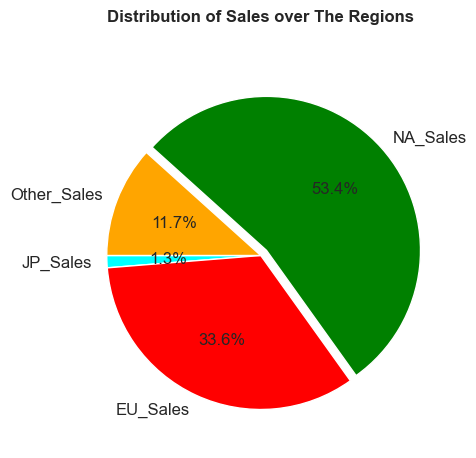

In [718]:
explode=[0,0,0.05,0];
color= ['cyan', 'red', 'green', 'orange']

plt.pie(electronic_per,labels=electronic_per.index,radius=1,autopct='%1.1f%%',textprops={'fontsize':12},
        startangle=180,explode=explode,colors=color);



# Customize the plot
plt.title('Distribution of Sales over The Regions',fontsize=12, fontweight='bold', pad=30);

This pie chart provides a visual representation of the distribution of video game sales across various regions over multiple years. It highlights North America’s dominance in the market with 45.7% of total sales, followed by Japan at 25.5%, Europe at 23.4%, and other regions collectively contributing 5.3%. This data underscores the varying consumer preferences and market strengths in the global gaming industry.

**Comprehensive summary of electronic arts sales.**

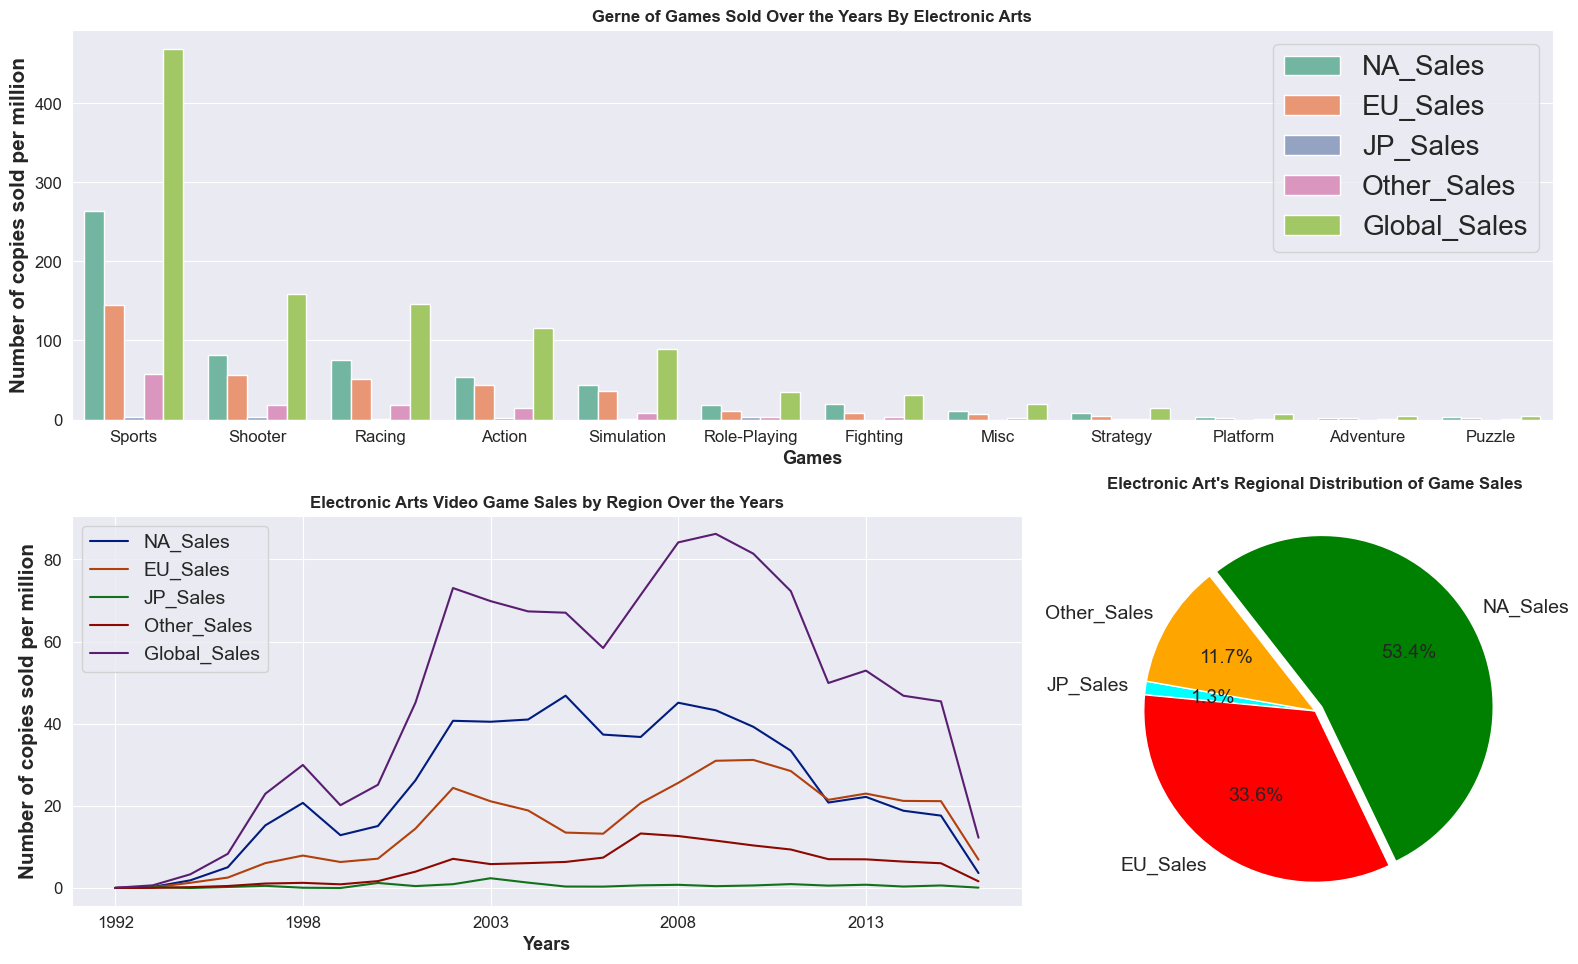

In [719]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(16, 10));

# Define the grid layout
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2], width_ratios=[2,1]);



# Create subplots
ax1 = fig.add_subplot(gs[0, :]);
ax2 = fig.add_subplot(gs[1, 0]);
ax3 = fig.add_subplot(gs[1, 1]);




# Plot the lines for each region

sns.barplot(data=elect_art_df_melted, x='Genre', y='value', hue="variable", palette='Set2',ax=ax1);



# Labels customization
#ax1.set_xlim(0, max(highest_selling_racing_NA_games_df['NA_Sales']) *2)
ax1.set_xlabel('Games', fontsize=13, fontweight='bold');
ax1.set_ylabel('Number of copies sold per million', fontsize=15, fontweight='bold');
ax1.tick_params(axis='x', labelsize=12, rotation=0);
ax1.tick_params(axis='y', labelsize=12);
ax1.set_title('Gerne of Games Sold Over the Years By Electronic Arts', fontsize=12, fontweight='bold');
ax1.legend(fontsize=20) ;



#Line plot for ax2
electronic_year_df.plot(ax=ax2);

# Labels customization
#ax1.set_xlim(0, max(highest_selling_racing_NA_games_df['NA_Sales']) *2)
ax2.set_xlabel('Years', fontsize=13, fontweight='bold');
ax2.set_ylabel('Number of copies sold per million', fontsize=15, fontweight='bold');
ax2.tick_params(axis='x', labelsize=12, rotation=0);
ax2.tick_params(axis='y', labelsize=12);
ax2.set_title('Electronic Arts Video Game Sales by Region Over the Years', fontsize=12, fontweight='bold');
ax2.legend(fontsize=14) ;


#Pie chart for ax2
explode=[0,0,0.05,0];
color= ['cyan', 'red', 'green', 'orange'];

ax3.pie(electronic_per,labels=electronic_per.index,
        radius=1.1,autopct='%1.1f%%',textprops={'fontsize':14},
        startangle=170,explode=explode,colors=color);

# Move the pie chart downwards
ax3.set_position([0.53, 0.13, 0.5, 0.25]);  # Adjust the coordinates as needed
ax3.set_title("Electronic Art's Regional Distribution of Game Sales", fontsize=12, fontweight='bold', pad=20);




#ax1.set_xticks([])
#ax1.set_yticks([])

plt.tight_layout(pad=1);

1. **Genre of Games Sold Over the Years By Electronic Art**:
   - The bar chart shows the number of copies sold per million for different game genres.
   - Sport games sky-rocketed selling over 400 million copies where North America and Europe contributed significantly to the global sales.
   - Different colors represent sales in different regions: NA_Sales (green), EU_Sales (red), JP_Sales (blue), Other_Sales (purple), and Global_Sales (cyan).

2. **Electronic Art's  Video Game Sales by Region Over the Years**:
   - The line chart spans from 1992 to 2016.
   - It illustrate sales trends in different regions (NA, EU, JP, Other) and globally.
   - They reached their peak in 2009 selling avove 89 million copies globally before sharply declining asnd slightly above 30 million in europe the same year, also their highest sales in north america was attained in 2005 with about 46 million copies of games sold.
   - They had lesser sales of their games in Japan and a fluctuating sales in other part of the world.


3. **Electronic Art’s Regional Distribution of Game Sales**:
   - NA_Sales constitute 53.4% of total sales.
   - EU_Sales are 33.6%, JP_Sales are 11.7%, and Other_Sales are 1.3%.

Electroic Arts Sport games is the most succesful genre of games in terms of sales , with North America being the largest market buyer of their games contributing more than 50%.

# Activision 🎮

In [ ]:
activision_df = video_gm_sales_df[video_gm_sales_df['Publisher'].str.contains("Activision")]
activision_df

In [722]:
activision_genre_df = activision_df.Genre.value_counts()
activision_genre_df

Genre
Action          310
Sports          164
Shooter         159
Misc            104
Racing           73
Platform         60
Role-Playing     41
Adventure        25
Strategy         23
Simulation       23
Fighting          7
Puzzle            7
Name: count, dtype: int64

These are the number of Genre game title Activision created in the course of the years. It appears that they developed more action games to other genres.

Let's delve into the sales of each genres of games they created.


In [ ]:
active_df = activision_df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales", "Global_Sales"]].sum().reset_index().sort_values("Global_Sales", ascending=False);
active_df

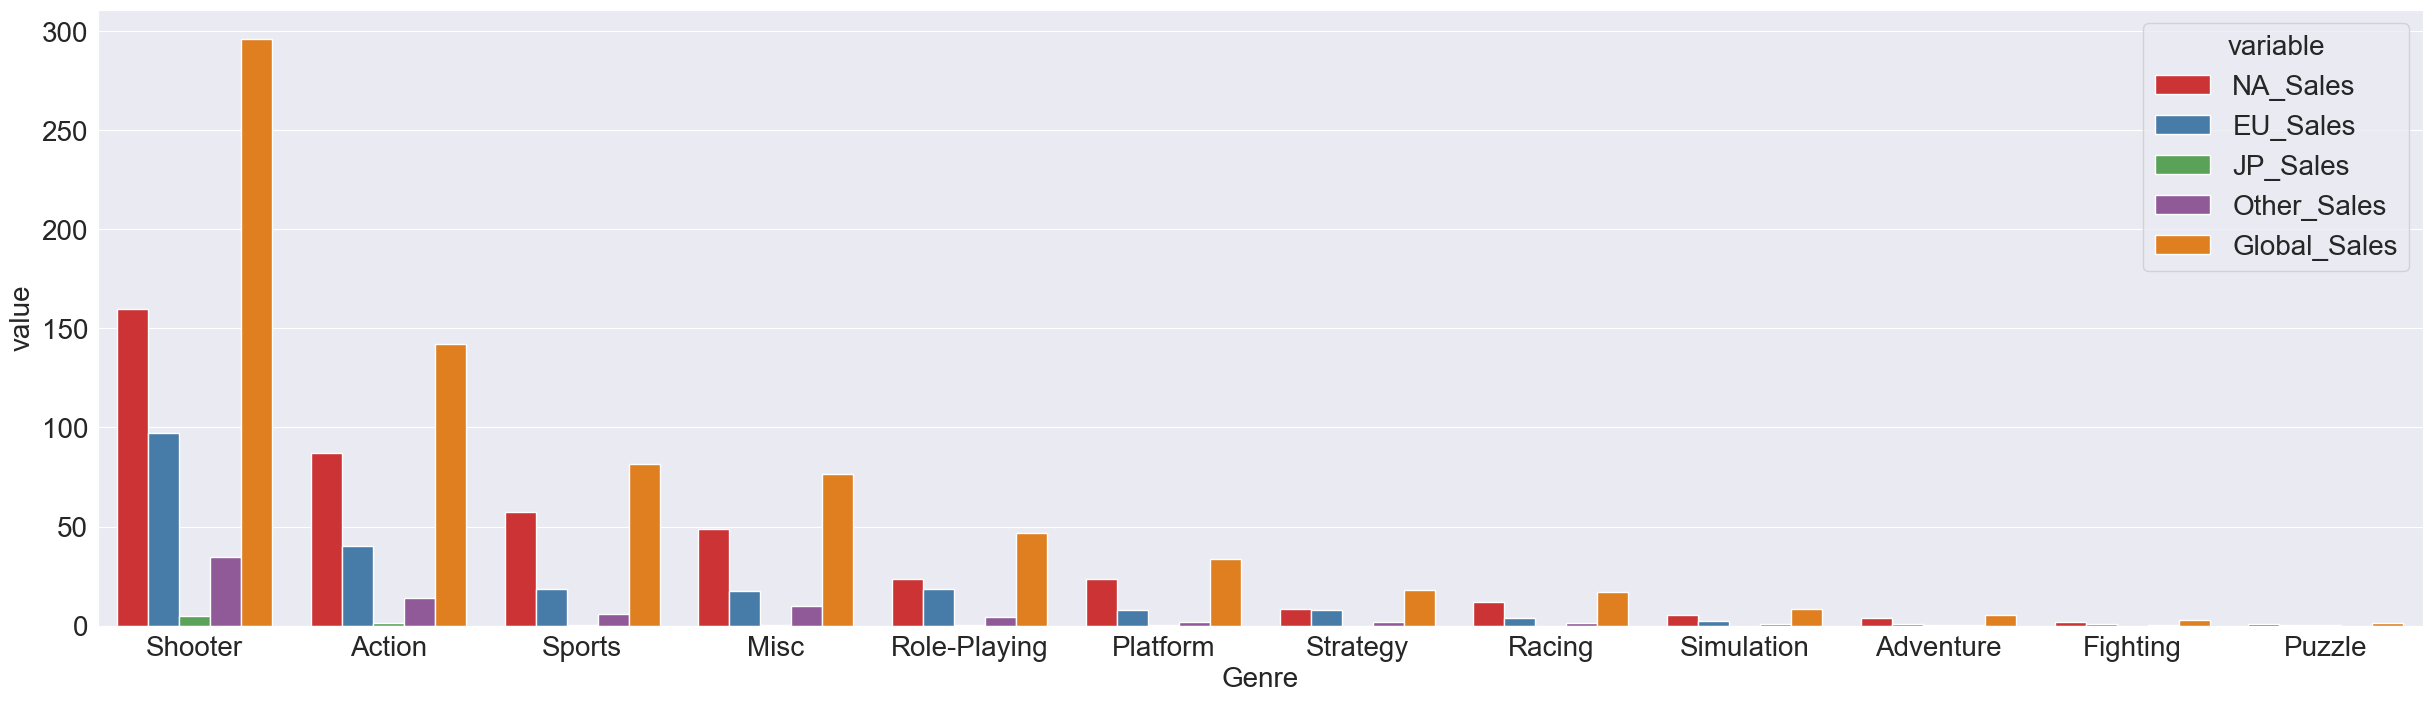

In [724]:
plt.figure(figsize=(30, 8));


# Melt the DataFrame to create a tidy format
active_df_melted = pd.melt(active_df , id_vars='Genre', 
                    value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales", "Global_Sales"])

ax = sns.barplot(data=active_df_melted, x='Genre', y='value', hue="variable", palette='Set1')

This figure shows the market trend of **Activision** genres of games sold over the years. Recall that Shooter game titles was half the action games titles developed but it sold more that their action and sports games combined. Their shooter games leading all other of their gernes developed at the global market as well as in Nort America and in Europe. 

Moving futher, i want to check their sales trend over the years.

In [ ]:
activision_year_df = activision_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
activision_year_df

In [726]:
activision_year_df.index = activision_year_df.index.astype(str)

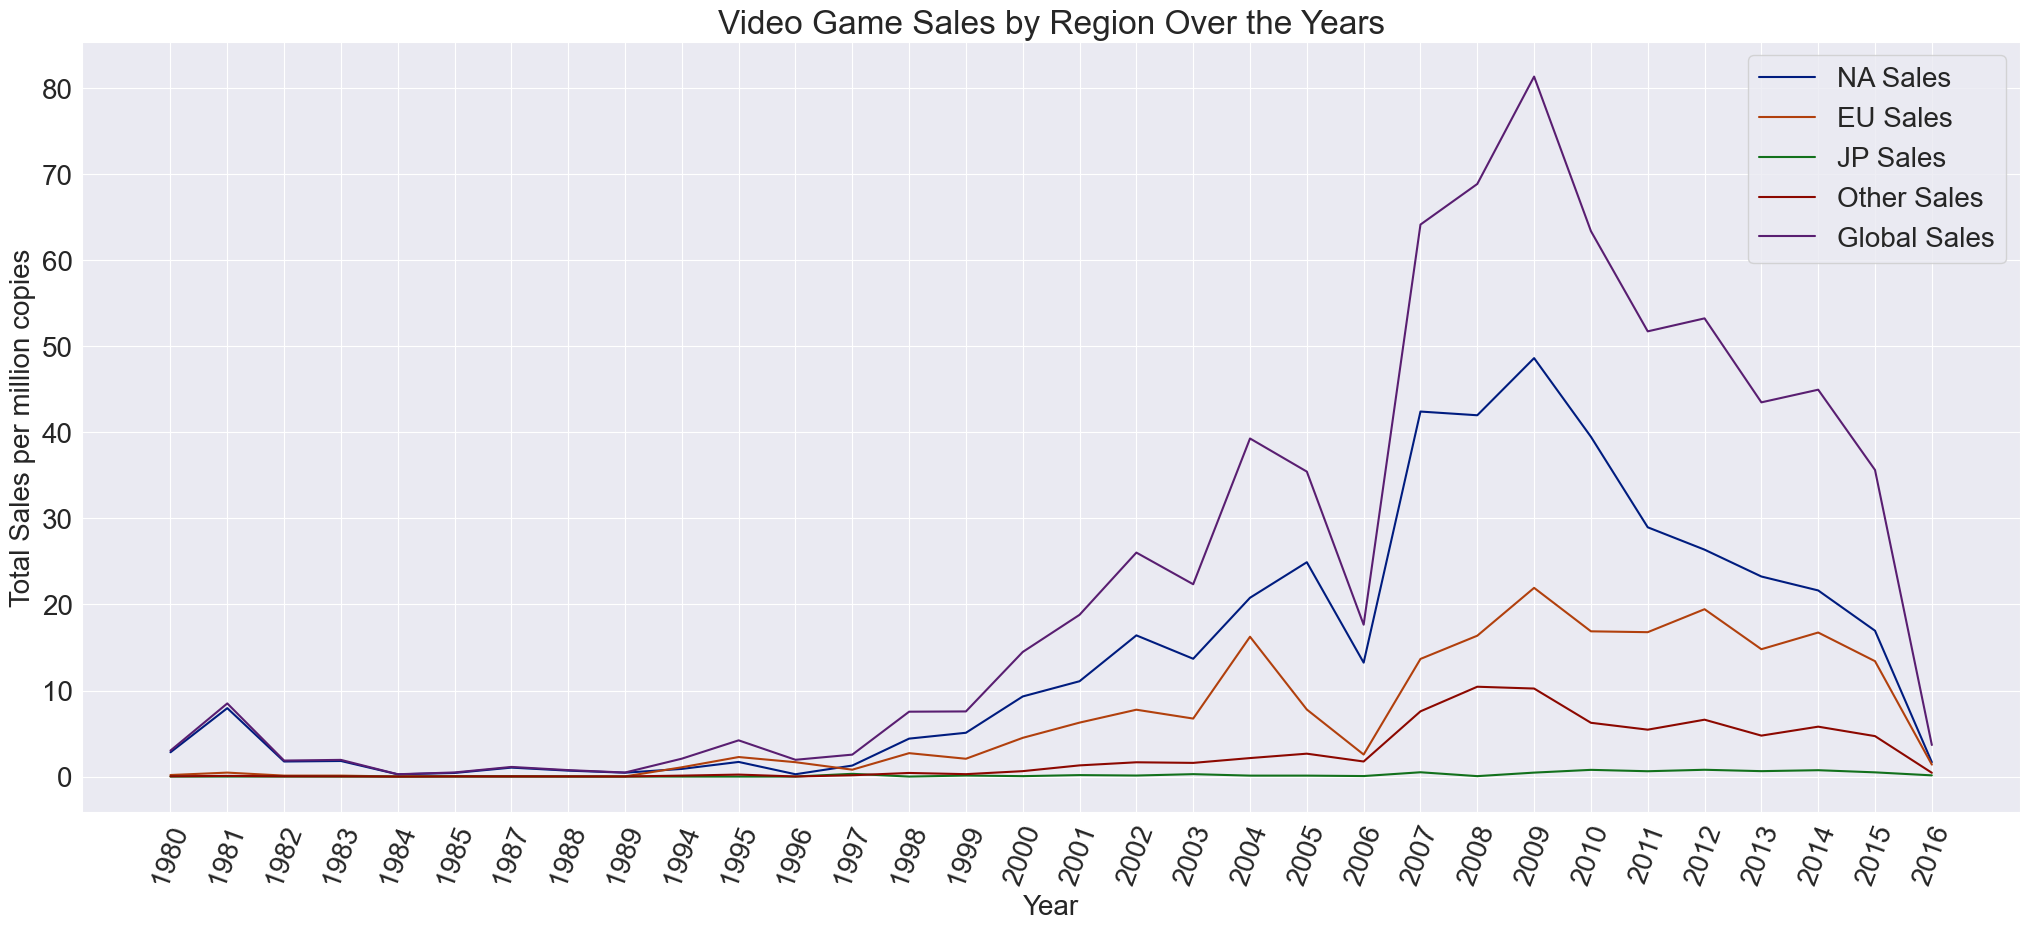

In [727]:
plt.figure(figsize=(25, 10))

# Plot the lines for each region
plt.plot(activision_year_df.index, activision_year_df['NA_Sales'],  label='NA Sales',)
plt.plot(activision_year_df.index, activision_year_df['EU_Sales'],  label='EU Sales')
plt.plot(activision_year_df.index, activision_year_df['JP_Sales'],  label='JP Sales')
plt.plot(activision_year_df.index, activision_year_df['Other_Sales'],  label='Other Sales')
plt.plot(activision_year_df.index, activision_year_df['Global_Sales'], label='Global Sales')

# Customize the plot
plt.title('Video Game Sales by Region Over the Years')
plt.xlabel('Year')
plt.xticks( rotation=70,fontsize=20)

plt.ylabel('Total Sales per million copies')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


The line chart titled “Activision game sales over the Years” depicts the sales trends of video games across different regions from 1980 to 2016.


1. **North America (NA) Sales**: The blue line shows a significant increase in sales, peaking around **2009**, before gradually declining.
2. **Europe (EU) Sales**: Represented by the orange line, EU sales also peak around **2008**, but at a lower volume than NA sales.
3. **Japan (JP) Sales**: The green line remains relatively stable over the years, with minor fluctuations.
4. **Other Regions Sales**: The red line indicates consistent sales throughout the period.
5. **Global Sales**: The purple line aggregates all regional sales. It sharply peaks around **2009** before declining.

Overall, global video game sales have seen fluctuations, with NA and EU leading the market during the peak years. Japan's sales have remained steady, while other regions contribute consistently.


In [728]:
activision_per=  activision_df[['JP_Sales', 'EU_Sales', 'NA_Sales', 'Other_Sales',]].sum()
activision_per

JP_Sales         6.54
EU_Sales       214.96
NA_Sales       431.62
Other_Sales     75.40
dtype: float64

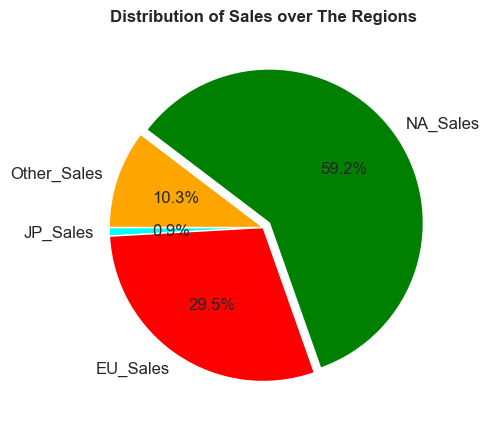

In [730]:
explode=[0,0,0.05,0];
color= ['cyan', 'red', 'green', 'orange']

plt.pie(activision_per,labels=activision_per.index,radius=1,autopct='%1.1f%%',textprops={'fontsize':12},
        startangle=180,explode=explode,colors=color);



# Customize the plot
plt.title('Distribution of Sales over The Regions', fontsize=12, fontweight='bold', pad=10);

This pie chart provides a visual representation of the distribution of video game sales across various regions over multiple years. It highlights North America’s dominance in the market with 45.7% of total sales, followed by Japan at 25.5%, Europe at 23.4%, and other regions collectively contributing 5.3%. This data underscores the varying consumer preferences and market strengths in the global gaming industry.

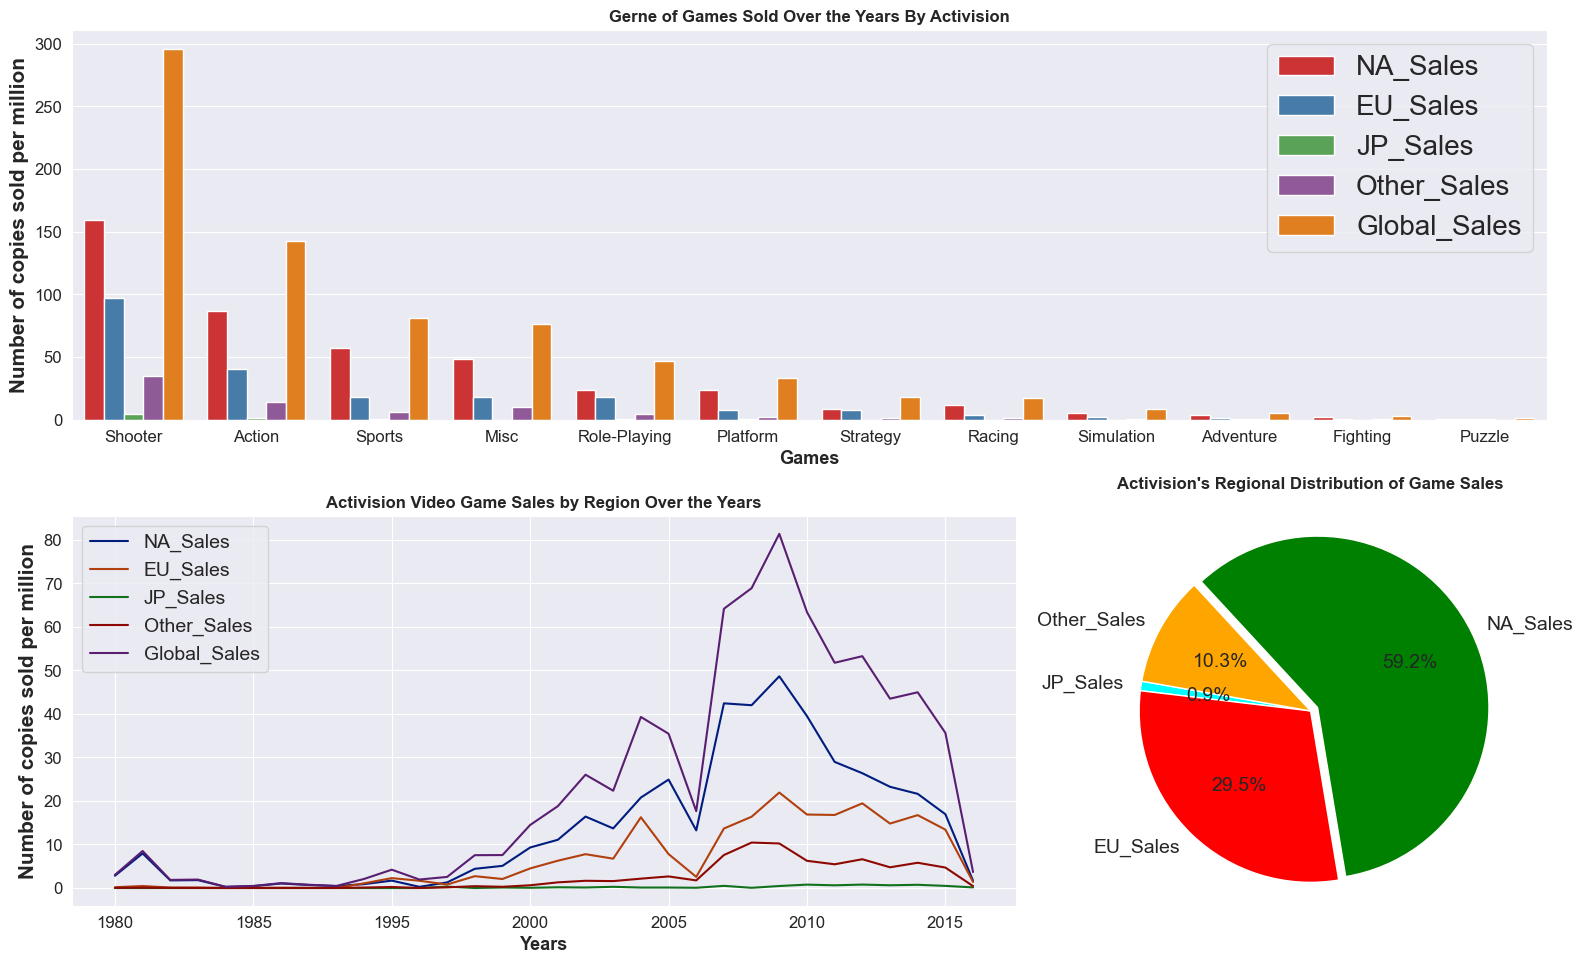

In [731]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(16, 10));

# Define the grid layout
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2], width_ratios=[2,1]);



# Create subplots
ax1 = fig.add_subplot(gs[0, :]);
ax2 = fig.add_subplot(gs[1, 0]);
ax3 = fig.add_subplot(gs[1, 1]);




# Plot the lines for each region

sns.barplot(data=active_df_melted, x='Genre', y='value', hue="variable", palette='Set1',ax=ax1);



# Labels customization
#ax1.set_xlim(0, max(highest_selling_racing_NA_games_df['NA_Sales']) *2)
ax1.set_xlabel('Games', fontsize=13, fontweight='bold');
ax1.set_ylabel('Number of copies sold per million', fontsize=15, fontweight='bold');
ax1.tick_params(axis='x', labelsize=12, rotation=0);
ax1.tick_params(axis='y', labelsize=12);
ax1.set_title('Gerne of Games Sold Over the Years By Activision', fontsize=12, fontweight='bold');
ax1.legend(fontsize=20) ;



#Line plot for ax2
activision_year_df.plot(ax=ax2);

# Labels customization
#ax1.set_xlim(0, max(highest_selling_racing_NA_games_df['NA_Sales']) *2)
ax2.set_xlabel('Years', fontsize=13, fontweight='bold');
ax2.set_ylabel('Number of copies sold per million', fontsize=15, fontweight='bold');
ax2.tick_params(axis='x', labelsize=12, rotation=0);
ax2.tick_params(axis='y', labelsize=12);
ax2.set_title('Activision Video Game Sales by Region Over the Years', fontsize=12, fontweight='bold');
ax2.legend(fontsize=14) ;


#Pie chart for ax2
explode=[0,0,0.05,0];
color= ['cyan', 'red', 'green', 'orange'];

ax3.pie(activision_per,labels=activision_per.index,
        radius=1.1,autopct='%1.1f%%',textprops={'fontsize':14},
        startangle=170,explode=explode,colors=color);

# Move the pie chart downwards
ax3.set_position([0.53, 0.13, 0.5, 0.25]);  # Adjust the coordinates as needed
ax3.set_title("Activision's Regional Distribution of Game Sales", fontsize=12, fontweight='bold', pad=20);




#ax1.set_xticks([])
#ax1.set_yticks([])

plt.tight_layout(pad=1);

1. **Genre of Games Sold Over the Years By Activision**:
   - The bar charts shows the number of copies sold per million for different game genres.
   - It depicts that their shooter games have the highest number of copies sold, followed by action games and sports games.
   - 

2. **Activision  Video Game Sales by Region Over the Years**:
   - The line chart spans from 1980 to 2016 spanning oer 40 years.
   - It shows sales trends in different regions (NA, EU, JP, Other) and globally.
   - Just as their colleague Electronic Art, **Activision** also had their highest sales in 2009 their selling avove 81 million copies globally before sharply declining and slightly above 21 million in europe the same year, also their highest sales in north america 48 million + copies of games sold.
   - They had poor sales of their games in Japan and above 10 million sales in other part of the world.


3. **Electronic Art’s Regional Distribution of Game Sales**:
   - NA_Sales constitute 59.2% of total sales.
   - EU_Sales are 29.5%, JP_Sales are 0.9%, and Other_Sales are 10.3%.

Activision shooting games are the most succesful of their games in terms of sales , with North America being the largest market buyer of their games contributing more than 59%.

Though no among the top 5 best selling publishers of all time, i will be repeating the same analysis for **Sega** base on personal preference.

# Sega 🎮

In [ ]:
sega_df = video_gm_sales_df[video_gm_sales_df['Publisher'].str.contains("Sega")]
sega_df

In [733]:
sega_genre_df = sega_df.Genre.value_counts()
sega_genre_df

Genre
Sports          134
Action           96
Role-Playing     64
Misc             62
Platform         52
Racing           48
Shooter          40
Fighting         37
Strategy         34
Adventure        31
Puzzle           22
Simulation       12
Name: count, dtype: int64

In [ ]:
sega_sales_df = sega_df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales","Other_Sales", "Global_Sales"]].sum().reset_index().sort_values("Global_Sales", ascending=False);
sega_sales_df

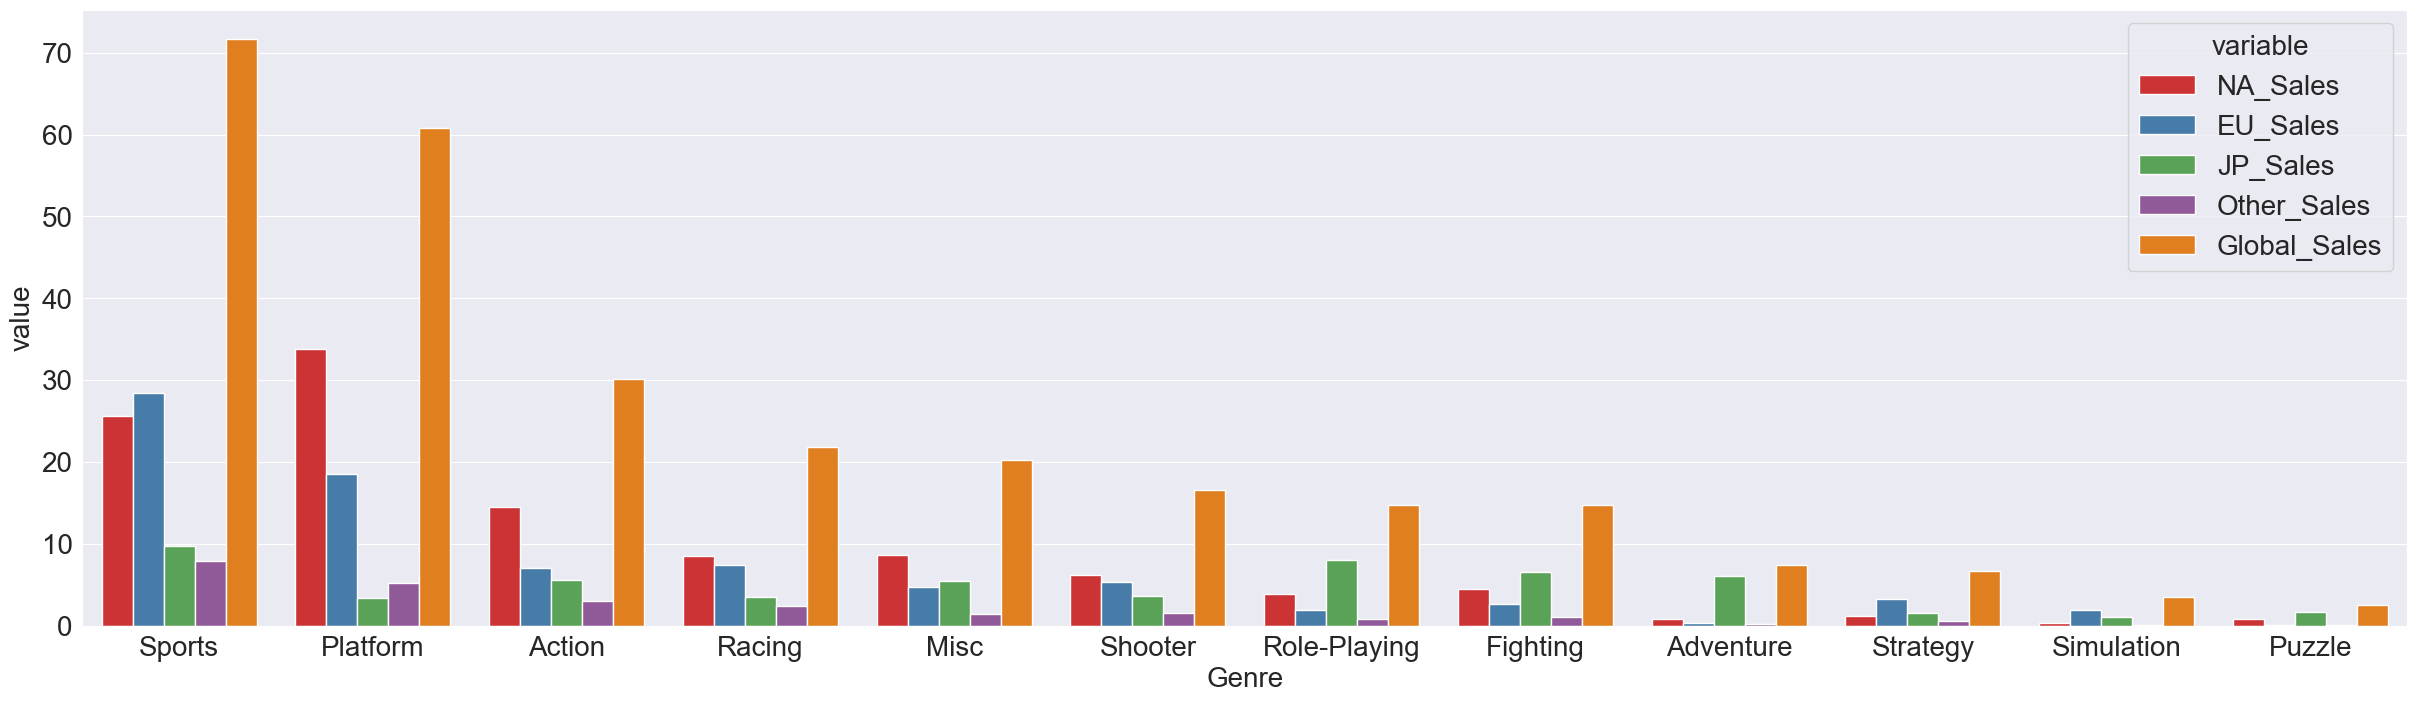

In [735]:
plt.figure(figsize=(30, 8));


# Melt the DataFrame to create a tidy format
sega_melted = pd.melt(sega_sales_df , id_vars='Genre', 
                    value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales", "Global_Sales"])

ax = sns.barplot(data=sega_melted, x='Genre', y='value', hue="variable", palette='Set1')

In [ ]:
sega_year_df = sega_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
sega_year_df

In [736]:
sega_year_df.index = sega_year_df.index.astype(str)

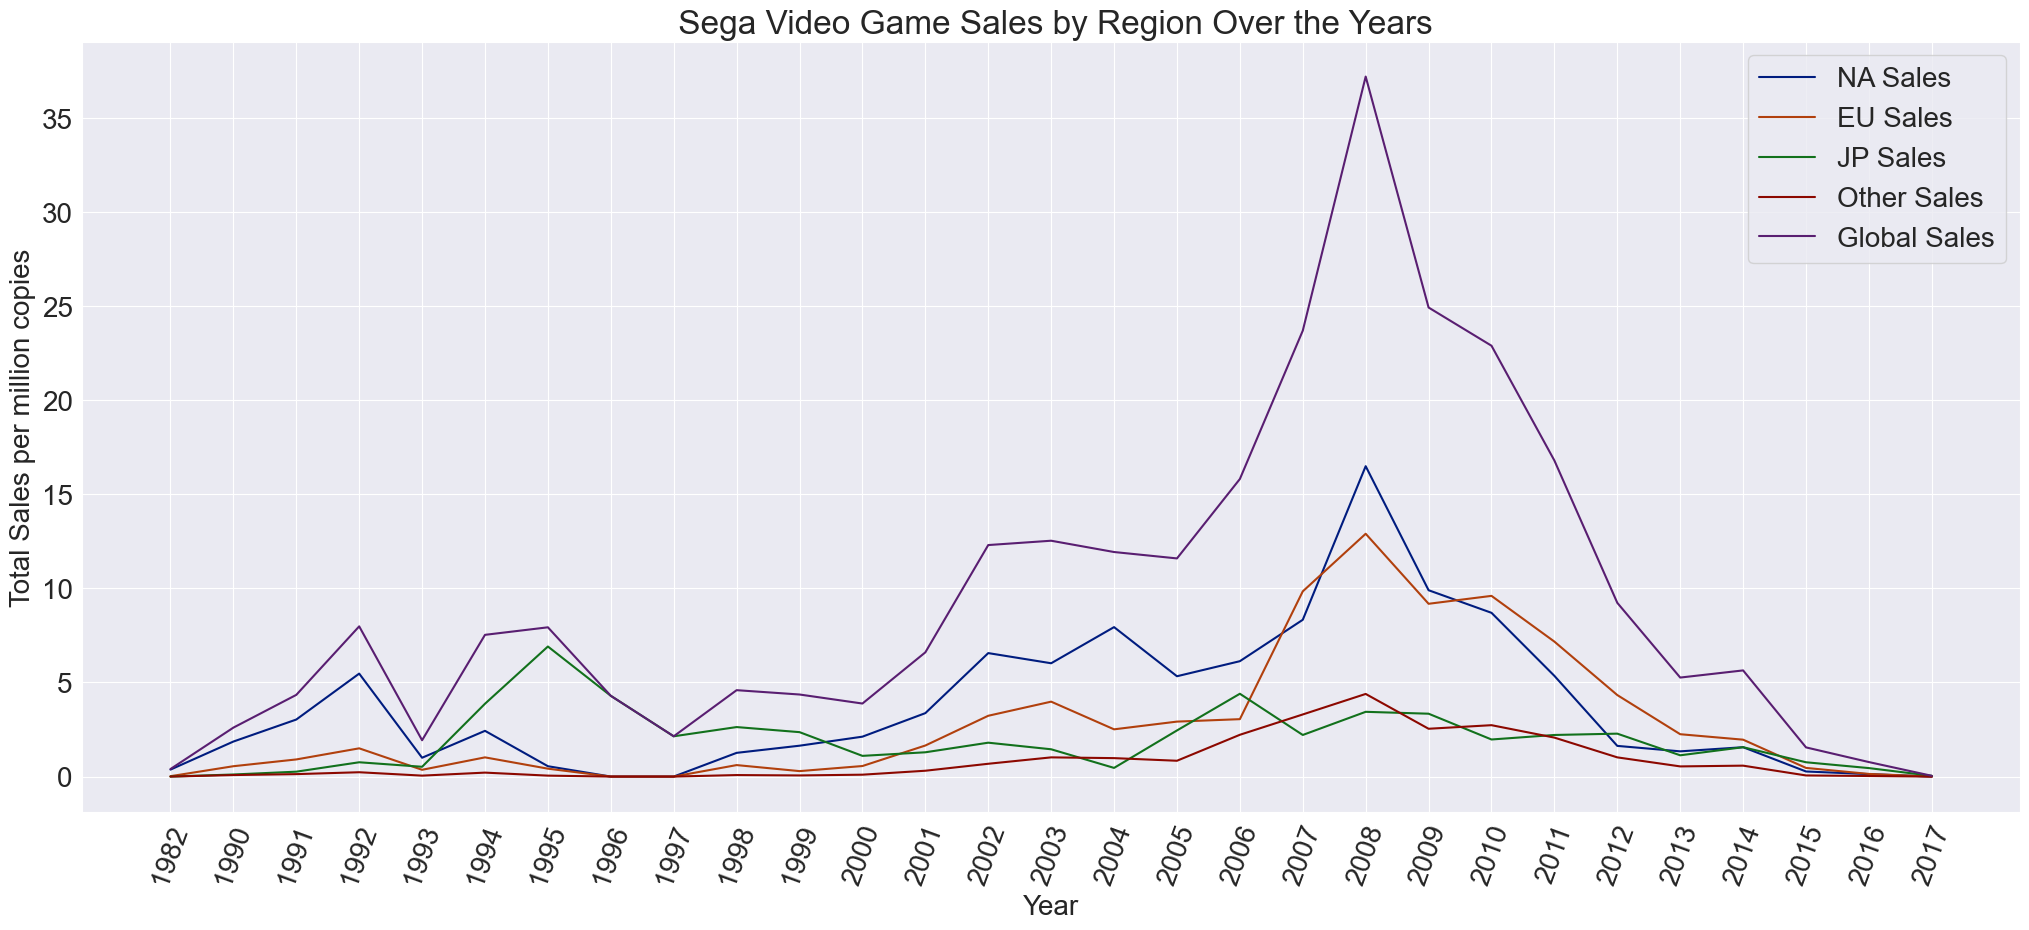

In [737]:
plt.figure(figsize=(25, 10))

# Plot the lines for each region
plt.plot(sega_year_df.index, sega_year_df['NA_Sales'],  label='NA Sales',)
plt.plot(sega_year_df.index, sega_year_df['EU_Sales'],  label='EU Sales')
plt.plot(sega_year_df.index, sega_year_df['JP_Sales'],  label='JP Sales')
plt.plot(sega_year_df.index, sega_year_df['Other_Sales'],  label='Other Sales')
plt.plot(sega_year_df.index, sega_year_df['Global_Sales'], label='Global Sales')

# Customize the plot
plt.title(' Sega Video Game Sales by Region Over the Years')
plt.xlabel('Year')
plt.xticks( rotation=70,fontsize=20)

plt.ylabel('Total Sales per million copies')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()



- The graph covers the period from **1982** to **2017**.
- It displays sales data for different regions: **North America (NA)**, **Europe (EU)**, **Japan (JP)**, and **Other Sales**.
- Notably, there's a significant peak in **Global Sales** around **2008**.
- However, post-2008, there's a sharp decline in both **Global** and regional sales.

In essence, Sega experienced a boom in sales during the mid-2000s, followed by a subsequent downturn.



In [738]:
sega_per=  sega_df[['JP_Sales', 'EU_Sales', 'NA_Sales', 'Other_Sales',]].sum()
sega_per

JP_Sales        56.19
EU_Sales        81.41
NA_Sales       108.78
Other_Sales     24.30
dtype: float64

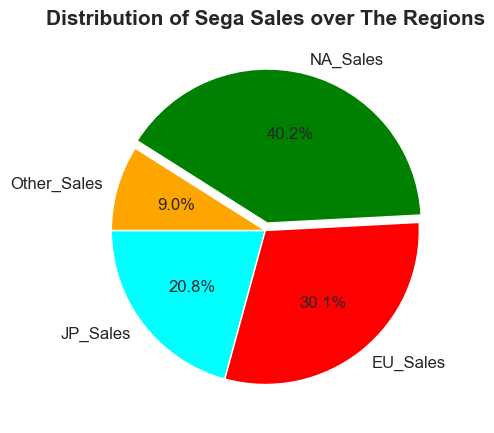

In [651]:
explode=[0,0,0.05,0];
color= ['cyan', 'red', 'green', 'orange']

plt.pie(sega_per,labels=sega_per.index,radius=1,autopct='%1.1f%%',textprops={'fontsize':12},
        startangle=180,explode=explode,colors=color);



# Customize the plot
plt.title('Distribution of Sega Sales over The Regions', pad=10, fontsize=15, fontweight='bold');


Distribution of **Sega** Video Game Sales Across Various Regions Over the Years.

This interesting distributiondepicts that;

- **North America (NA)** accounts for the highest sales, representing **40.2%** of the total.
- **Europe (EU)** follows with **30.1%** of the sales.
- **Japan (JP)** immensely contributes **20.8%** to the overall sales which make them the highest buyer of **Sega** games over the years per country.
- Other regions collectively make up **9.0%** of the Sega game sales.

The distribution aslo shows that Japan played a significant role in Sega’s game sales which is the highest buyers of their games.

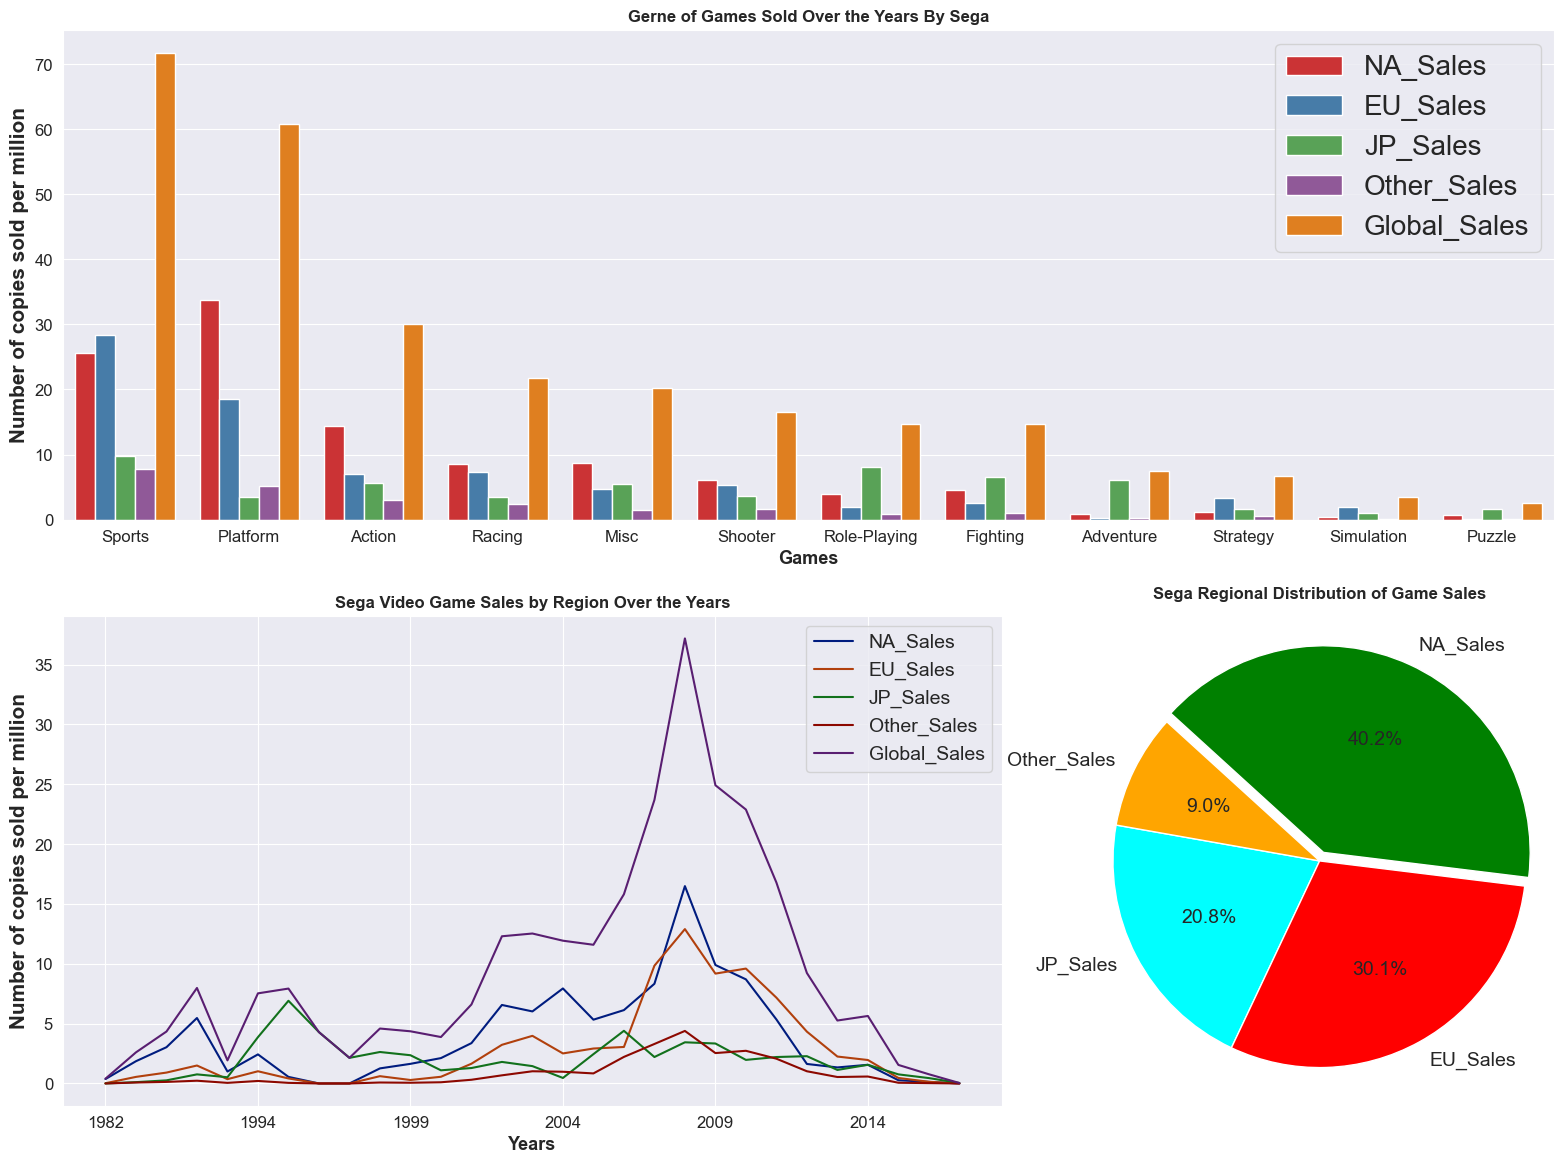

In [739]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(16, 12));

# Define the grid layout
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 2], width_ratios=[2,1]);



# Create subplots
ax1 = fig.add_subplot(gs[0, :]);
ax2 = fig.add_subplot(gs[1, 0]);
ax3 = fig.add_subplot(gs[1, 1]);




# Plot the lines for each region

sns.barplot(data=sega_melted, x='Genre', y='value', hue="variable", palette='Set1',ax=ax1);



# Labels customization
#ax1.set_xlim(0, max(highest_selling_racing_NA_games_df['NA_Sales']) *2)
ax1.set_xlabel('Games', fontsize=13, fontweight='bold');
ax1.set_ylabel('Number of copies sold per million', fontsize=15, fontweight='bold');
ax1.tick_params(axis='x', labelsize=12, rotation=0);
ax1.tick_params(axis='y', labelsize=12);
ax1.set_title('Gerne of Games Sold Over the Years By Sega', fontsize=12, fontweight='bold');
ax1.legend(fontsize=20) ;



#Line plot for ax2
sega_year_df.plot(ax=ax2);

# Labels customization
#ax1.set_xlim(0, max(highest_selling_racing_NA_games_df['NA_Sales']) *2)
ax2.set_xlabel('Years', fontsize=13, fontweight='bold');
ax2.set_ylabel('Number of copies sold per million', fontsize=15, fontweight='bold');
ax2.tick_params(axis='x', labelsize=12, rotation=0);
ax2.tick_params(axis='y', labelsize=12);
ax2.set_title('Sega Video Game Sales by Region Over the Years', fontsize=12, fontweight='bold');
ax2.legend(fontsize=14) ;


#Pie chart for ax2
explode=[0,0,0.05,0];
color= ['cyan', 'red', 'green', 'orange'];

ax3.pie(sega_per,labels=sega_per.index,
        radius=1.1,autopct='%1.1f%%',textprops={'fontsize':14},
        startangle=170,explode=explode,colors=color);

# Move the pie chart downwards
ax3.set_position([0.53, 0.13, 0.5, 0.25]);  # Adjust the coordinates as needed
ax3.set_title("Sega Regional Distribution of Game Sales", fontsize=12, fontweight='bold', pad=20);




#ax1.set_xticks([])
#ax1.set_yticks([])

plt.tight_layout(pad=1);

1. **Genre of Games Sold Over the Years By Sega**:
   - The bar charts sales trend shows the number of copies  of games sold per million for different game genres designed by **Sega**.
   - It shows that  their **sports and platform** games had a significant sales over the years.
   - It also shows that europe had their best interest in their sport games leading North America
   - Their fighting and adventure games was led by japan over the years.

2. **Sega  Video Game Sales by Region Over the Years**:
   - The line chart shows that in 2008 they reached their peak with more than 37 million copies sold globally then declined drastically afterwards.
   - They had poor and so many inconsistencies of their games in Japan and in other part of the world.


3. **Sega games Regional Distribution of Game Sales**:
   - NA_Sales constitute 40.2% of total sales.
   - Japan only contributed 20.8% of the global sales
   - EU_Sales and Others 39.1 %.

Sega games are bought more in Japan talking about single country sales. with North America being the largest market buyer of their games contributing more than 40.2%.

Having highlighted some of the personal preferences in the gaming industry, we will now examing the evolution of gaming platforms and their varying popularity over the years.

# Video Games By Platform

In [ ]:
platform_counts = video_gm_sales_df.Platform.value_counts()
platform_counts

In [ ]:
platfom_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['DS'])]
platfom_df

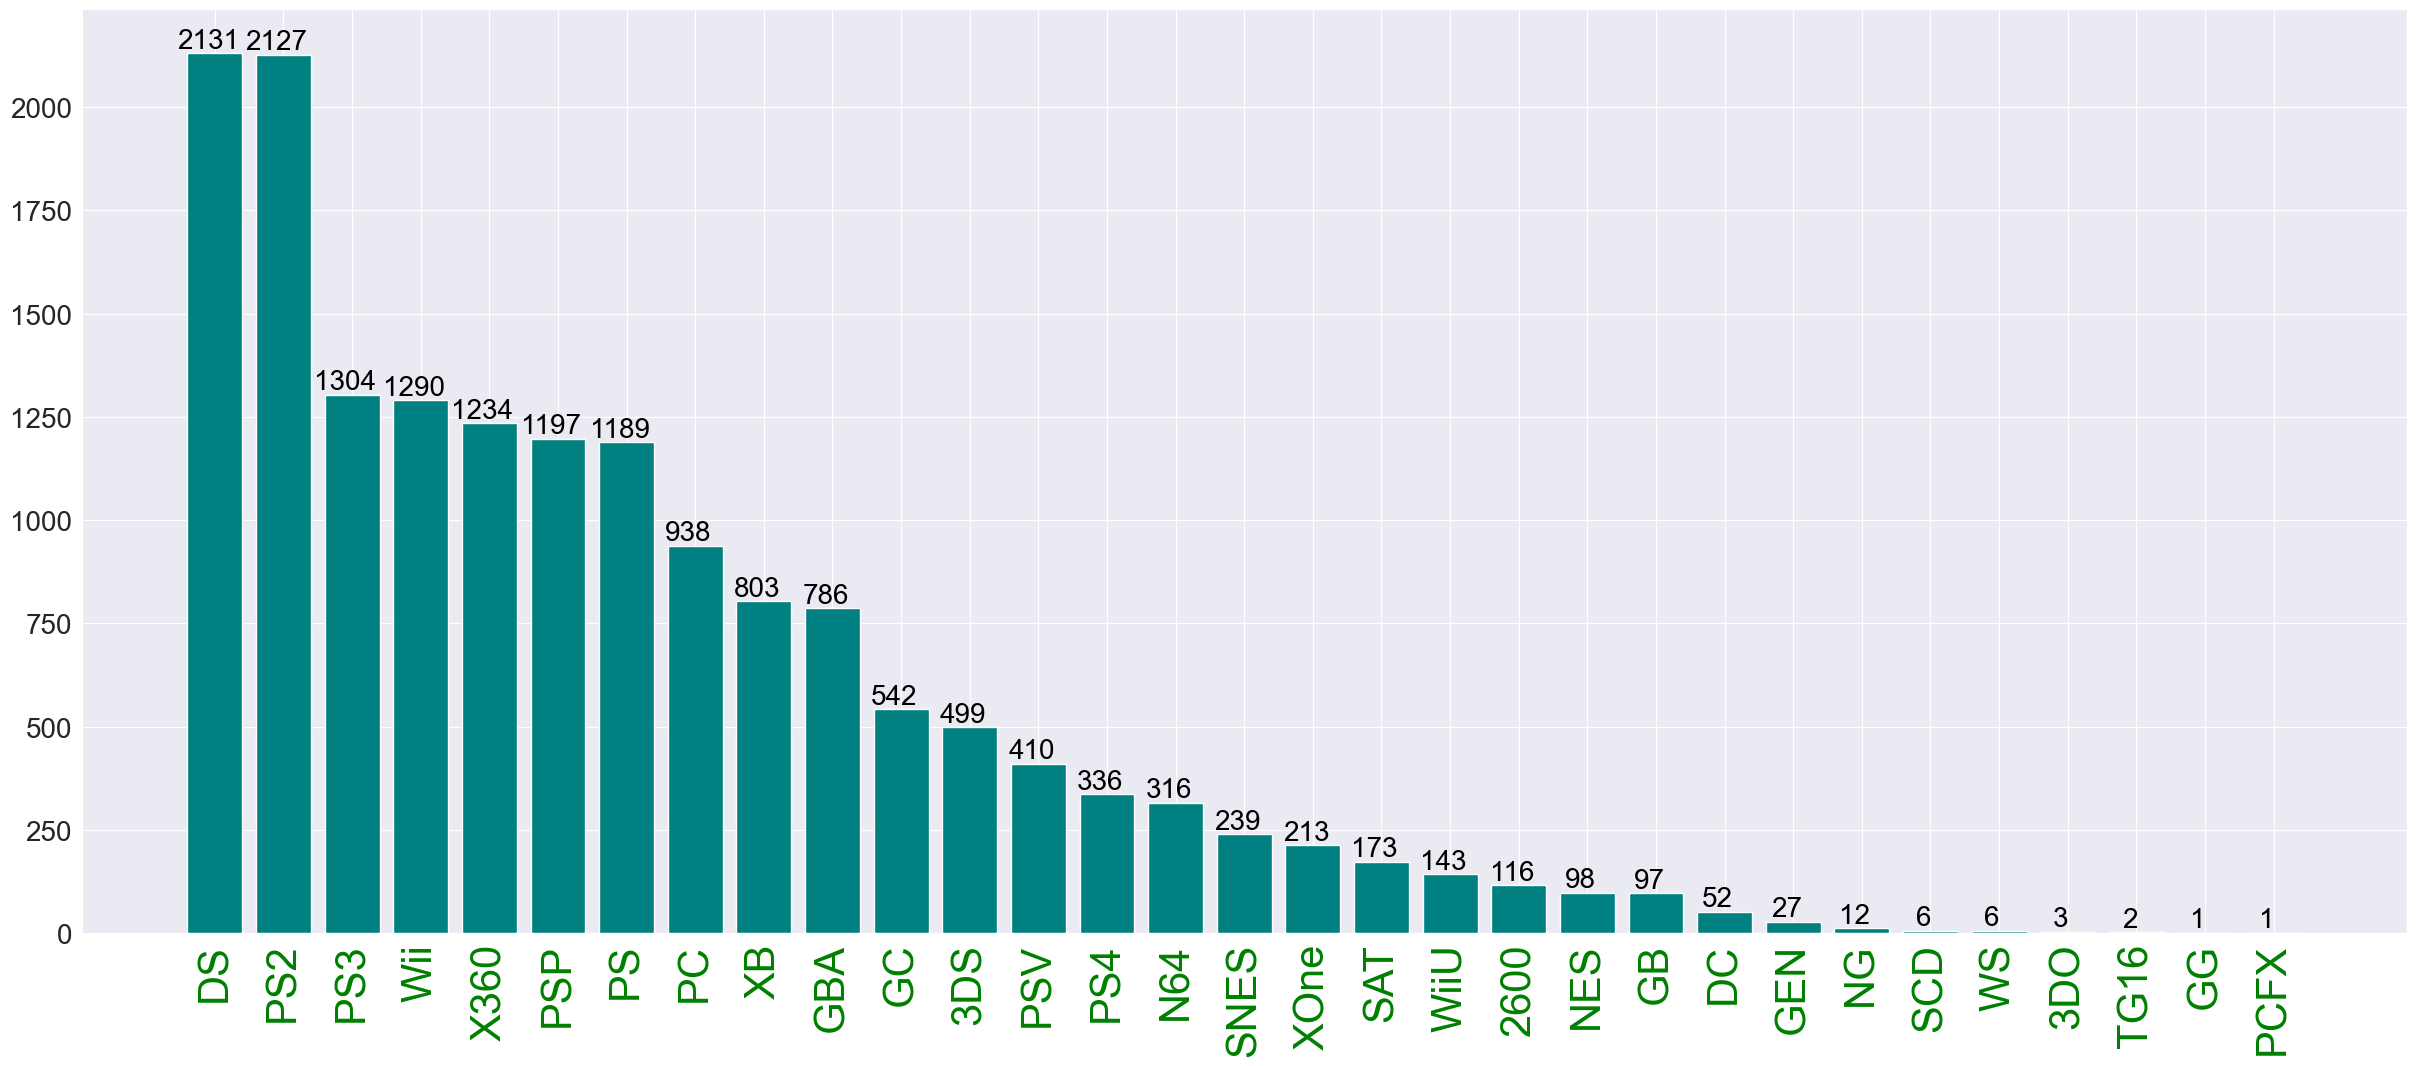

In [742]:
plt.figure(figsize=(30, 12));
barhs = plt.bar(platform_counts.index.tolist(),platform_counts.values.tolist(), color='teal')

for j in range(len(platform_counts)):
       plt.text(x=j - 0.1, y=platform_counts[j] + 30, s=platform_counts[j], size=20, color="black",ha='center', va='center')
#plt.title("Gender buyers".title(), fontsize=15)
plt.xticks(rotation=90,fontsize=30,color="g");

The bar graph illustrates of video game platforms based on the number of titles created. The Nintendo DS (DS) and PlayStation 2 (PS2) lead the chart surpassing 2100 game titles created each over the years, indicating their dominance in the gaming market. Other consoles like the PlayStation 3 (PS3), Wii, and PlayStation Portable (PSP) also created 1000 game titles each. The data suggests a competitive landscape where these consoles have made a substantial impact, with the DS and PS2 being the most successful in terms of game title created.

With this  information provided let's the best selling games of eacth top 5 platforms.

# DS Platform

In [ ]:
# Platfomr by DS
ds_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['DS'])].sort_values("Global_Sales", ascending=False).head(5);
ds_df

### DS Sales over the Years

In [744]:
platfom_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['DS'])]


In [ ]:
platform_sales_df = platfom_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
platform_sales_df 

In [746]:
platform_sales_df.index = platform_sales_df.index.astype(str)

In [747]:
fig = px.line(platform_sales_df,width=1000,height=500, template="plotly_dark")

# Customize the y-axis tick labels
fig.update_layout(
    
    yaxis_title="Number of copies sold in million".title(),
    xaxis_title="Years",  # Added x-axis title
    title="Market Sales Trend for DS Platform by Nintendo over the years".title(),
    title_font=dict(size=18),
    
    title_x=0.5, title_y=0.95, title_xanchor='center',
)

#fig.update_layout(bargap=0.1)
fig.show()

**Market Sales Trend for DS Platform by Nintendo Over the Years**:
   - The line graph shows the sales trend for Nintendo's DS platform from 1985 to 2020.
   - Different lines represent sales in various regions:
       - **NA_Sales**: Sales in North America.
       - **EU_Sales**: Sales in Europe.
       - **JP_Sales**: Sales in Japan.
       - **Other_Sales**: Sales in other regions.
       - **Global_Sales**: Total global sales.
  
       - Sales peaked around 2007 and 2008 and sharply declined since.
       - Global sales reached over 149 million copies in 2007 before declining.
       - 

Nintendo's DS platform experienced significant sales growth but declined after reaching its peak in 2007 and 2008. North America contributed the most to global sales.



# PS2 Platform

In [ ]:
ps2_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['PS2'])].sort_values("Global_Sales", ascending=False).head(5);
ps2_df

 ### PS2 Sales over the Years

In [749]:
ps2_sales_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['PS2'])]


In [ ]:
ps2_year_sales_df = ps2_sales_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
ps2_year_sales_df 

In [751]:
ps2_year_sales_df.index = ps2_year_sales_df.index.astype(str)

In [752]:
fig = px.line(ps2_year_sales_df,width=1000,height=500)

# Customize the y-axis tick labels
fig.update_layout(
    
    template="plotly_dark",
    yaxis_title="Number of copies sold in million".title(),
    xaxis_title="Years",  # Added x-axis title
    title="Market Sales Trend for PS2 Platform over the years".title(),
    title_font=dict(size=18),
    
    title_x=0.5, title_y=0.95, title_xanchor='center',
)


fig.show()



1. **Market Sales Trend for PS2 Platform Over the Years**:
   - The line graph shows the sales trend for Nintendo's PS2 platform from 2000 to 2011.
   - In year 2004 **PS2** reached their peak selling above 210 million copies be declining.
   - Global sales reached over 120 million copies sold at its peak around 2004.
   - North America contributed the most to global sales but fluctuating.

**PS2** platform experienced significant sales growth but declined after reaching its peak in 2004, with North America being the largest market.

# PS3

In [ ]:
ps3_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['PS3'])].sort_values("Global_Sales", ascending=False).head(5);
ps3_df

### Yearly Sales 

In [755]:
ps3_sales_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['PS3'])]

In [ ]:
ps3_year_sales_df = ps3_sales_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
ps3_year_sales_df 

In [757]:
ps3_year_sales_df.index = ps3_year_sales_df.index.astype(str)

In [758]:
fig = px.line(ps3_year_sales_df,width=1000,height=500)

# Customize the y-axis tick labels
fig.update_layout(
    
    template="plotly_dark",
    yaxis_title="Number of copies sold in million".title(),
    xaxis_title="Years",  # Added x-axis title
    title="Market Sales Trend for PS3 Platform over the years".title(),
    title_font=dict(size=18),
    
    title_x=0.5, title_y=0.95, title_xanchor='center',
)


fig.show()

Sales peaked around 2011 with approximately 159 million copies sold globally and declined thereafter.

North America and Europe contributed significantly to global sales, contributing around 120 million copies to the global sales in 2011 before declining.

Other sales an Japan remained consistently low throughout all the years.



# WII Plarform

In [ ]:
wii_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['Wii'])].sort_values("Global_Sales", ascending=False).head(5);
wii_df

In [760]:
wii_sale_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['Wii'])]

In [ ]:
wii_year_sales_df = wii_sale_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
wii_year_sales_df

In [762]:
wii_year_sales_df.index = wii_year_sales_df.index.astype(str)

In [763]:
fig = px.line(wii_year_sales_df,width=1000,height=500)

# Customize the y-axis tick labels
fig.update_layout(
    
    template="plotly_dark",
    yaxis_title="Number of copies sold in million".title(),
    xaxis_title="Years",  # Added x-axis title
    title="Market Sales Trend for WII Platform by nintendo over the years".title(),
    title_font=dict(size=18),
    
    title_x=0.5, title_y=0.95, title_xanchor='center',
)


fig.show()

Certainly! Let's summarize the findings from the image:

1. **Market Sales Trend for Wii Platform by Nintendo Over the Years**:

   - Sales peaked around 2009 in all the regions selling about 210 million copies globally sharply declining from thence.
   

   - North America stands as a major consumer of their market .


# X360

In [764]:
xbox360_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['X360'])].sort_values("Global_Sales", ascending=False).head(5);
xbox360_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


In [765]:
x360_sale_df =video_gm_sales_df[video_gm_sales_df['Platform'].isin(['X360'])]

In [ ]:
x360_year_sale_df = x360_sale_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum()
x360_year_sale_df

In [767]:
x360_year_sale_df.index = x360_year_sale_df.index.astype(str)

In [768]:
fig = px.line(x360_year_sale_df,width=800,height=500)

# Customize the y-axis tick labels
fig.update_layout(
    
    template="plotly_dark",
    yaxis_title="Number of copies sold in million".title(),
    xaxis_title="Years",  # Added x-axis title
    title="Market Sales Trend for x360 Platform  over the years".title(),
    title_font=dict(size=18),
    showlegend=True, 
    
    title_x=0.5, title_y=0.95, title_xanchor='center',
   

)



fig.show()


**X360** Sales peaked around 2010 with over 170 million copies sold before declining sharply.

**North America** contributed significantly to global sales, peaking at around 107 million copies.

**Europe and Japan** sales remained relatively stable over the years but at lower volumes.

**Other sales** remained consistently low throughout all the years.




**Creating a conprehensive summary of all the sales of the publisshers over the years**

In [769]:
platform_sales_df = platfom_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum().reset_index()
ps2_year_sales_df = ps2_sales_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum().reset_index()
ps3_year_sales_df = ps3_sales_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum().reset_index()
wii_year_sales_df = wii_sale_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum().reset_index()
x360_year_sale_df = x360_df.groupby("Year")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum().reset_index()

In [770]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Create a subplot with 1 row and 1 column
#fig = make_subplots(rows=2, cols=2)

# Structuring the subplots
fig = make_subplots(rows=3,cols=2, 
                    subplot_titles=("Sales of DS Video Games Over the Years", 
                                    "Sales of X360 Video Games Over the Years" ,
                                    "Sales of PS2 Video Games Over the Years",
                                    "Sales of PS3 Video Games Over the Years",
                                    "Sales of WII Video Games Over the Years"),
                    specs= [[{}, {}],
                            [{}, {}],
                            [{'colspan': 2}, None]],
                    horizontal_spacing=0.1, #10% of figure width
                    vertical_spacing=0.15, #5% of the figure height
                    column_widths=[0.5, 0.5], #first column is wider
                    row_heights=[0.3, 0.3, 0.4], # Third row is taller
                    
                    )






#Ds Platform
fig.add_trace(go.Scatter(x=platform_sales_df.Year, y=platform_sales_df['NA_Sales'], mode='lines', name='North America'), row=1, col=1)
fig.add_trace(go.Scatter(x=platform_sales_df.Year, y=platform_sales_df.EU_Sales, mode='lines', name='Europe'), row=1, col=1)
fig.add_trace(go.Scatter(x=platform_sales_df.Year, y=platform_sales_df['JP_Sales'], mode='lines', name='Japan'), row=1, col=1)
fig.add_trace(go.Scatter(x=platform_sales_df.Year, y=platform_sales_df.Other_Sales, mode='lines', name='Others'), row=1, col=1)
fig.add_trace(go.Scatter(x=platform_sales_df.Year, y=platform_sales_df.Global_Sales, mode='lines', name='Global'), row=1, col=1)




# X360 Platform
fig.add_trace(go.Scatter(x=x360_year_sale_df.Year, y=x360_year_sale_df['NA_Sales'], mode='lines', name='North America'), row=1, col=2)
fig.add_trace(go.Scatter(x=x360_year_sale_df.Year, y=x360_year_sale_df.EU_Sales, mode='lines', name='Europe'), row=1, col=2)
fig.add_trace(go.Scatter(x=x360_year_sale_df.Year, y=x360_year_sale_df['JP_Sales'], mode='lines', name='Japan'), row=1, col=2)
fig.add_trace(go.Scatter(x=x360_year_sale_df.Year, y=x360_year_sale_df.Other_Sales, mode='lines', name='Others'), row=1, col=2)
fig.add_trace(go.Scatter(x=x360_year_sale_df.Year, y=x360_year_sale_df.Global_Sales, mode='lines', name='Global'), row=1, col=2)


# PS2 Platform

fig.add_trace(go.Scatter(x=ps2_year_sales_df.Year, y=ps2_year_sales_df['NA_Sales'], mode='lines', name='North America'), row=2, col=1)
fig.add_trace(go.Scatter(x=ps2_year_sales_df.Year, y=ps2_year_sales_df.EU_Sales, mode='lines', name='Europe'), row=2, col=1)
fig.add_trace(go.Scatter(x=ps2_year_sales_df.Year, y=ps2_year_sales_df['JP_Sales'], mode='lines', name='Japan'), row=2, col=1)
fig.add_trace(go.Scatter(x=ps2_year_sales_df.Year, y=ps2_year_sales_df.Other_Sales, mode='lines', name='Others'), row=2, col=1)
fig.add_trace(go.Scatter(x=ps2_year_sales_df.Year, y=ps2_year_sales_df.Global_Sales, mode='lines', name='Global'), row=2, col=1)


# PS3 Platform
fig.add_trace(go.Scatter(x=ps3_year_sales_df.Year, y=ps3_year_sales_df['NA_Sales'], mode='lines', name='North America'), row=2, col=2)
fig.add_trace(go.Scatter(x=ps3_year_sales_df.Year, y=ps3_year_sales_df.EU_Sales, mode='lines', name='Europe'), row=2, col=2)
fig.add_trace(go.Scatter(x=ps3_year_sales_df.Year, y=ps3_year_sales_df['JP_Sales'], mode='lines', name='Japan'), row=2, col=2)
fig.add_trace(go.Scatter(x=ps3_year_sales_df.Year, y=ps3_year_sales_df.Other_Sales, mode='lines', name='Others'), row=2, col=2)
fig.add_trace(go.Scatter(x=ps3_year_sales_df.Year, y=ps3_year_sales_df.Global_Sales, mode='lines', name='Global'), row=2, col=2)



# WII Platform
fig.add_trace(go.Scatter(x=wii_year_sales_df.Year, y=wii_year_sales_df['NA_Sales'],mode='lines', name='North America'), row=3, col=1)
fig.add_trace(go.Scatter(x=wii_year_sales_df.Year, y=wii_year_sales_df.EU_Sales, mode='lines', name='Europe'), row=3, col=1)
fig.add_trace(go.Scatter(x=wii_year_sales_df.Year, y=wii_year_sales_df['JP_Sales'], mode='lines', name='Japan'), row=3, col=1)
fig.add_trace(go.Scatter(x=wii_year_sales_df.Year, y=wii_year_sales_df.Other_Sales, mode='lines', name='Others'), row=3, col=1)
fig.add_trace(go.Scatter(x=wii_year_sales_df.Year, y=wii_year_sales_df.Global_Sales, mode='lines', name='Global'), row=3, col=1)

# Customize the layout
fig.update_layout(
    template='plotly_dark',
    yaxis_title='Number of copies sold (in million)',
    xaxis_title='Years',
    title='Games Platforms Market Sales Over The Years',
    title_font=dict(size=14),
    height=650,
    title_x=0.5, title_y=0.95, title_xanchor='center',

)





fig.update_xaxes(tickfont=dict(size=8), )
fig.update_yaxes(tickfont=dict(size=8))
#fig.update_xaxes(showgrid=False, range=[0,33],row=1,col=1)

#fig.update_xaxes(showgrid=False)
#ig.update_yaxes(showgrid=False, range=[0, 25],row=2, col=1)
#fig.update_yaxes(showgrid=False, range=[0, 30],row=3,col=1)

# Update subplot titles font size
fig.update_annotations(font=dict(size=10)) 

# Show the plot
fig.show()


This is a comprehnsive summary of the just concluded research concatinating the yealy sales of **DS, PS2, PS3, WII and X360** games.

This dashbord shows that PS2 has the highest sales of game globally with more than 211 million copies of games sold globally in a single year accompanied by wii selling about 210 million copies in 2009.

It also depicts that North America is their highest consumers of their games contributing immensely to the global sales.

### Plotting all the top 5 best selling platform games above

In [771]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import offline

# Structuring the subplots
fig = make_subplots(rows=3,cols=2, 
                    subplot_titles=("Top 10 Best-Selling DS Video Games Globally", 
                                    "Top 10 Best-Selling PS2 Video Games Globally" ,
                                    "Top 10 Best-Selling PS3 Video Games Globally",
                                    "Top 10 Best-Selling WII Video Games Globally",
                                    "Top 10 Best-Selling X360 Video Games Globally"),
                    specs= [[{}, {}],
                            [{}, {}],
                            [{'colspan': 2}, None]],
                    horizontal_spacing=0.2, #10% of figure width
                    vertical_spacing=0.16, #5% of the figure height
                    column_widths=[0.5, 0.5], #first column is wider
                    row_heights=[0.3, 0.3, 0.4], # Third row is taller
                    
                    )

#DS Global Sales
fig.add_trace(go.Bar(x=ds_df["Global_Sales"],
                     y=ds_df["Name"], 
                     orientation='h',
                     text=ds_df["Global_Sales"], 
                     textposition='inside'),row=1, col=1)
                     
fig.update_traces(texttemplate=' %{text:.2f}M',
                  marker_color='green',row=1, col=1)

#PS2 Global Sales
fig.add_trace(go.Bar(x=ps2_df["Global_Sales"],
                     y=ps2_df["Name"],orientation='h',
                     text=ps2_df["Global_Sales"],
                     textposition="inside"),row=1, col=2)
fig.update_traces(texttemplate=' %{text:.2f}M', textfont_size=25,  marker_color='blue')

#PS3 GloBal Sales
fig.add_trace(go.Bar(x=ps3_df["Global_Sales"],
                     y=ps3_df["Name"],orientation='h',
                     text=ps3_df["Global_Sales"], 
                     textposition='inside',
                     marker=dict(color=ps3_df["Global_Sales"])),row=2, col=1)
fig.update_traces(texttemplate=' %{text:.2f}M', textfont_size=20,)





# Wii Global Sales

fig.add_trace(go.Bar(x=wii_df["Global_Sales"],
                     y=wii_df["Name"], orientation='h',
                     marker=dict(color=wii_df["Global_Sales"], #Using color_continous_scale
                     colorscale='rdylgn',# Specify an inbuilt color
                     cmin=wii_df["Global_Sales"].min(), # Set the min value for the color scale
                     cmax=wii_df["Global_Sales"].max()), # Set the max value for the color scale),
                     text=wii_df["Global_Sales"].apply(lambda x:  f'{x:.2f}M'),
                     textposition='outside'),row=2, col=2)
fig.update_traces(texttemplate=' %{text:.2f}M',textfont_size=20,
                  marker_color='green',row=1, col=1)
 
# X360 Global Sales

fig.add_trace(go.Bar(x=xbox360_df["Name"],
                     y=xbox360_df["Global_Sales"], 
                     #Using color_continous_scale
                     marker=dict(color=xbox360_df["Global_Sales"], colorscale='picnic',#mrybm Specify an inbuilt color
                                cmin=xbox360_df["Global_Sales"].min(), # Set the min value for the color scale
                                cmax=xbox360_df["Global_Sales"].max()), # Set the max value for the color scale
                     text=xbox360_df["Global_Sales"].apply(lambda x: f'{x:.2f}M'),
                     textposition='outside'),row=3, col=1)


            

fig.update_layout(height=650, width=1000,template="plotly_dark", title_text="Game Sales Dashboard By Platform",
                  
                  title_x=0.5, title_y=0.95, title_xanchor='center',
                 )


fig.update_xaxes(tickfont=dict(size=8), )
fig.update_yaxes(tickfont=dict(size=8))
fig.update_xaxes(showgrid=False, range=[0,33],row=1,col=1)

fig.update_xaxes(showgrid=False)
#ig.update_yaxes(showgrid=False, range=[0, 25],row=2, col=1)
fig.update_yaxes(showgrid=False, range=[0, 30],row=3,col=1)

# Update subplot titles font size
fig.update_annotations(font=dict(size=10))  # Adjust the size as needed
fig.show()

This figure above provides a detailed breakdown of the top 5 best-selling video games globally across five major gaming platforms: DS, PS2, PS3, Wii, and Xbox 360.

- **DS:** "New Super Mario Bros", leading the sales, followed by  “Nintendogs”, “Mario Kart DS”,  “Brain Age”, “Pokemon Diamond/Pokemon Pearl”. All Created by Nintendo.
- **PS2:** The sales is lead by “Grand Theft Auto: San Andreas” by, with “Grand Theft Auto: Vice City”, by **Take-Two Interactive** and Gran Turismo 3: A-Spec created by **Sony Computer Entertainment** also featuring in the top sales.
- **PS3:** Action game “Grand Theft Auto V” by **Sony Computer Entertainment** had the highest sales, accompanied by “Call of Duty: Black Ops II”,  “Call of Duty Modern Warfare 3”, “Call of Duty Black Ops II”, action games developed by **Activision**, and “Gran Turismo 5" by **Sony Computer Entertainment**.

 - **Wii:** “New Super Mario Bros. Wii” leads, with “Wii Play”, “Wii Sports Resort”, “Mario Kart Wii”, and “Wii Sports” completing the top sellers all published by Nintendo..
 
- **Xbox 360:** The graph shows “Kinect Adventures!”, “Grand Theft Auto V”, “Call of Duty: Modern Warfare 3”, and “Call of Duty Black Ops” as the top sellers.

Each game’s success reflects the unique preferences of the platform’s user base and the impact of franchise popularity on global sales.

## Inferences and Conclusions

Many inferences has been drawn from the video game sales. Here's a summary of a few of them:

- Based on the findings, **Nintendo** has the highest video games sales with more than 1.7 billion copies of games sold globally.

- It was also discorvered that Nintendo dominates the market, with over 90% of the top 10 best-selling games being developed among all other publishers

- WII Sport games designed by Nintendo in 2006 sold more than 82 million globally and more than 41 million only in North America.


- In the findings only Nintendo and Sega games had fair sales in Japan; this may be because Nintendo games is/are designed by a japanese national.

- North America had the larger percentage of game buyers across the regions.
